<a href="https://colab.research.google.com/github/DestinyAgboro/Premier-League-Football-Predictions/blob/main/English_Premier_League_Football_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_column", None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
df1= pd.read_csv('Premier League Football Predictions 2019_2020.csv')
df2 = pd.read_csv('Premier League Football Predictions 2020_2021.csv')
df3 = pd.read_csv('Premier League Football Predictions 2021_2022.csv')
df4 = pd.read_csv('Premier League Football Predictions 2022_2023.csv')
df5 = pd.read_csv('Premier League Football Predictions 2023_2024.csv')

In [ ]:
df1.shape, df2.shape, df3.shape, df4.shape, df5.shape

((380, 106), (380, 106), (380, 106), (380, 106), (380, 106))

In [ ]:
# Concatenate the dataframes to create a single dataframe with 1,900 records
English_Premier_League = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Check the shape of the combined dataframe to ensure it has 1,900 records
English_Premier_League.shape

(1900, 106)

In [ ]:
English_Premier_League.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.14,8.25,18.50,1.15,8.00,18.00,1.15,9.59,18.05,1.12,8.5,21.00,1.14,9.5,23.00,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,-2.25,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,1.14,9.50,21.00,1.14,9.0,20.00,1.15,8.00,18.00,1.14,10.43,19.63,1.11,9.5,21.00,1.14,9.50,23.00,1.16,10.50,23.00,1.14,9.52,19.18,1.3,3.50,1.34,3.44,1.36,3.76,1.32,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.50,5.75,1.26,11.00,6.10,1.25,11.68,6.53,1.26,13.00,6.0,1.24,12.00,6.5,1.25,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,1.75,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,12.00,7.00,1.25,11.00,6.0,1.26,11.00,6.10,1.25,11.11,6.68,1.27,11.00,6.5,1.24,12.00,6.50,1.25,13.00,7.00,1.29,11.14,6.46,1.26,1.4,3.00,1.43,3.03,1.50,3.22,1.41,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,1.95,3.60,3.90,1.97,3.55,3.80,2.04,3.57,3.90,2.00,3.5,3.80,2.00,3.6,4.00,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,-0.50,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,1.95,3.70,4.20,1.95,3.6,3.90,1.97,3.55,3.85,1.98,3.67,4.06,1.95,3.6,3.90,2.00,3.60,4.00,2.03,3.70,4.20,1.98,3.58,3.96,1.9,1.90,1.94,1.97,1.97,1.98,1.91,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.65,3.20,2.75,2.65,3.20,2.75,2.71,3.31,2.81,2.70,3.2,2.75,2.70,3.3,2.80,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,0.00,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,2.70,3.25,2.90,2.65,3.1,2.85,2.60,3.20,2.85,2.71,3.19,2.90,2.62,3.2,2.80,2.70,3.25,2.90,2.72,3.26,2.95,2.65,3.18,2.88,2.1,1.72,2.19,1.76,2.25,1.78,2.17,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.20,3.20,2.35,3.10,3.20,2.40,3.21,3.37,2.39,3.10,3.3,2.35,3.20,3.3,2.45,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,0.25,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,3.40,3.50,2.25,3.30,3.3,2.25,3.40,3.30,2.20,3.37,3.45,2.27,3.30,3.3,2.25,3.40,3.30,2.25,3.55,3.50,2.34,3.41,3.37,2.23,2.2,1.66,2.22,1.74,2.28,1.77,2.17,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [ ]:
English_Premier_League.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [ ]:
English_Premier_League.shape

(1900, 106)

In [ ]:
# Check the information of the dataset
English_Premier_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 1.5+ MB


In [ ]:
English_Premier_League.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
FTHG,1.563158,1.344233,0.00,1.00,1.00,2.00,9.00
FTAG,1.310000,1.238833,0.00,0.00,1.00,2.00,9.00
HTHG,0.707895,0.859504,0.00,0.00,1.00,1.00,5.00
HTAG,0.586842,0.789168,0.00,0.00,0.00,1.00,5.00
HS,13.868421,5.755008,1.00,10.00,13.00,17.00,36.00
...,...,...,...,...,...,...,...
PCAHA,1.968989,0.101888,1.30,1.89,1.96,2.05,2.38
MaxCAHH,2.014223,0.112214,1.80,1.93,2.01,2.09,3.95
MaxCAHA,2.026430,0.106409,1.30,1.94,2.02,2.11,2.52
AvgCAHH,1.934532,0.099936,1.70,1.86,1.93,2.01,3.66


# EDA

# Exploring result data

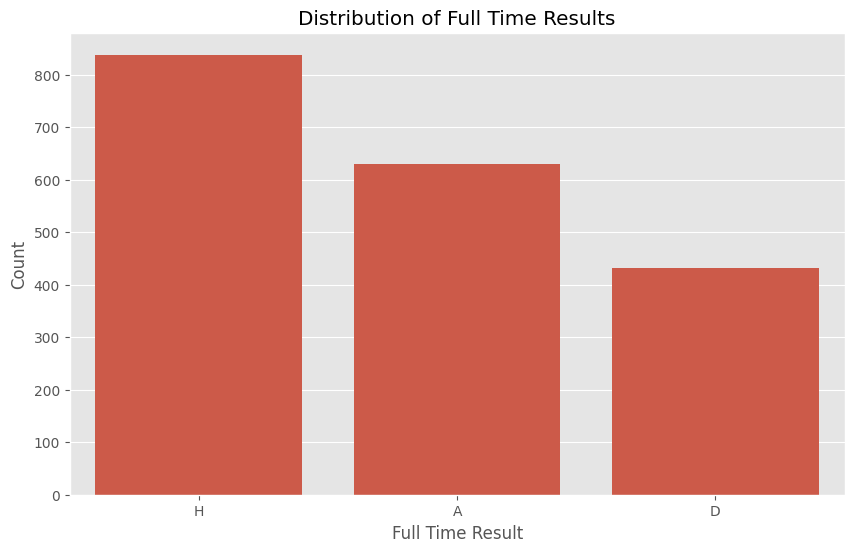

In [ ]:
# Distribution of Full Time Results
plt.figure(figsize=(10, 6))
sns.countplot(x='FTR', data=English_Premier_League)
plt.title('Distribution of Full Time Results')
plt.xlabel('Full Time Result')
plt.ylabel('Count')
plt.show()

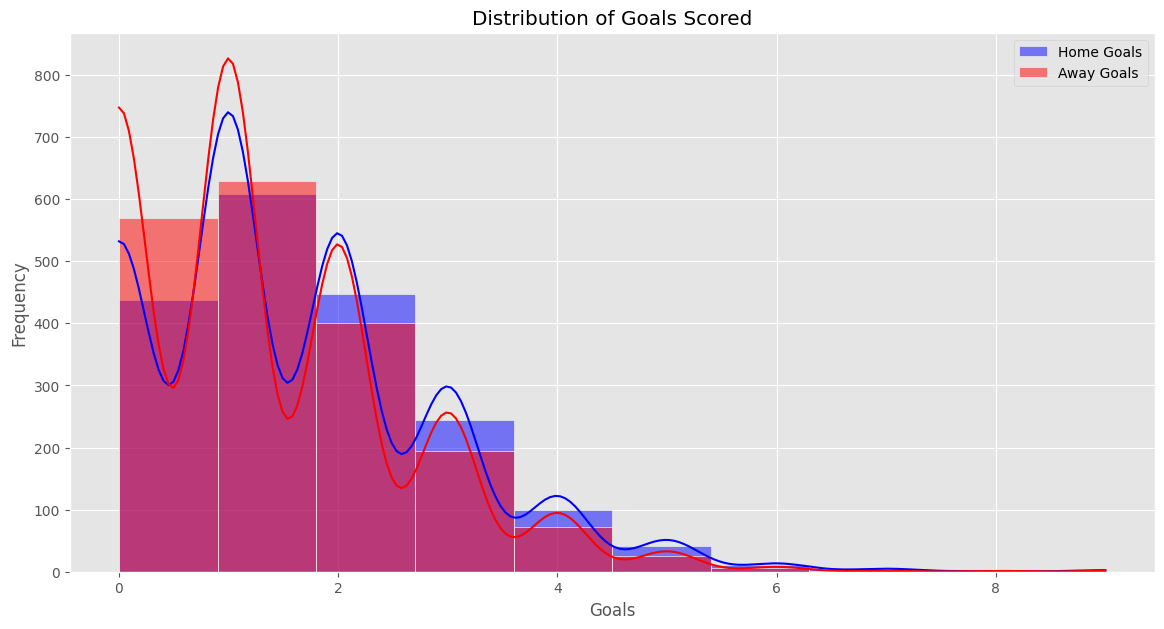

In [ ]:
# Goals Scored Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['FTHG'], bins=10, kde=True, color='blue', label='Home Goals')
sns.histplot(English_Premier_League['FTAG'], bins=10, kde=True, color='red', label='Away Goals')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Home vs Away Wins
home_wins = English_Premier_League[English_Premier_League['FTR'] == 'H'].shape[0]
away_wins = English_Premier_League[English_Premier_League['FTR'] == 'A'].shape[0]
draws = English_Premier_League[English_Premier_League['FTR'] == 'D'].shape[0]
print(f'Home Wins: {home_wins}')
print(f'Away Wins: {away_wins}')
print(f'Draws: {draws}')


Home Wins: 838
Away Wins: 630
Draws: 432


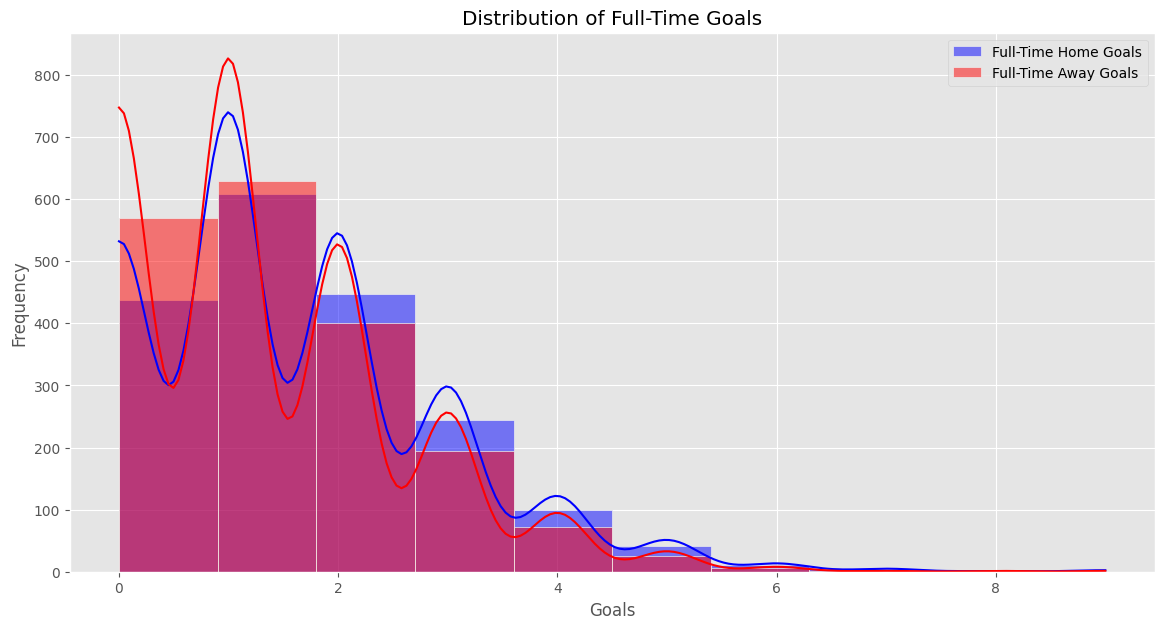

In [ ]:
# Goals Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['FTHG'], bins=10, kde=True, color='blue', label='Full-Time Home Goals')
sns.histplot(English_Premier_League['FTAG'], bins=10, kde=True, color='red', label='Full-Time Away Goals')
plt.title('Distribution of Full-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

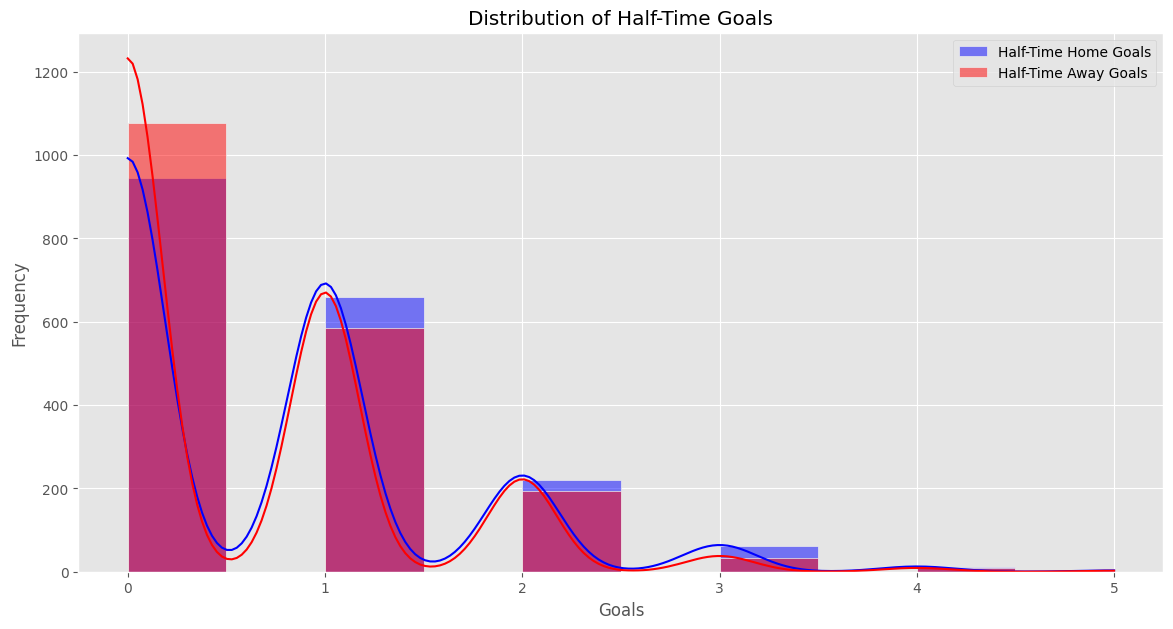

In [ ]:
# Half-Time Goals Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['HTHG'], bins=10, kde=True, color='blue', label='Half-Time Home Goals')
sns.histplot(English_Premier_League['HTAG'], bins=10, kde=True, color='red', label='Half-Time Away Goals')
plt.title('Distribution of Half-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

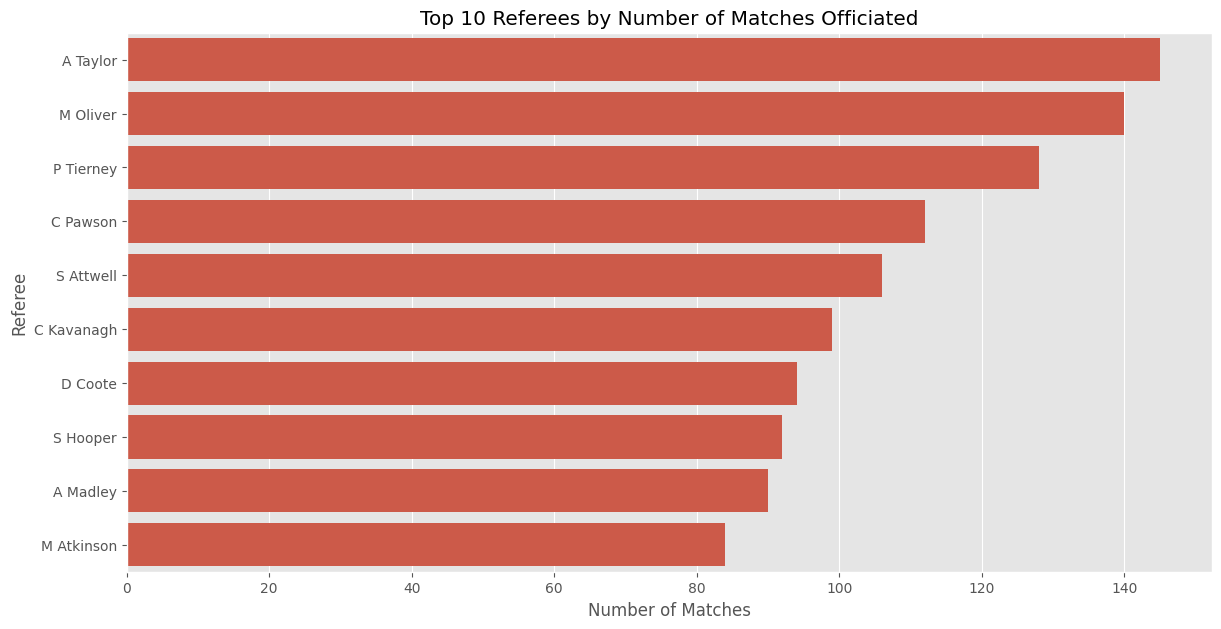

In [ ]:
# Referee Analysis
plt.figure(figsize=(14, 7))
sns.countplot(y='Referee', data=English_Premier_League, order=English_Premier_League['Referee'].value_counts().index[:10])
plt.title('Top 10 Referees by Number of Matches Officiated')
plt.xlabel('Number of Matches')
plt.ylabel('Referee')
plt.show()

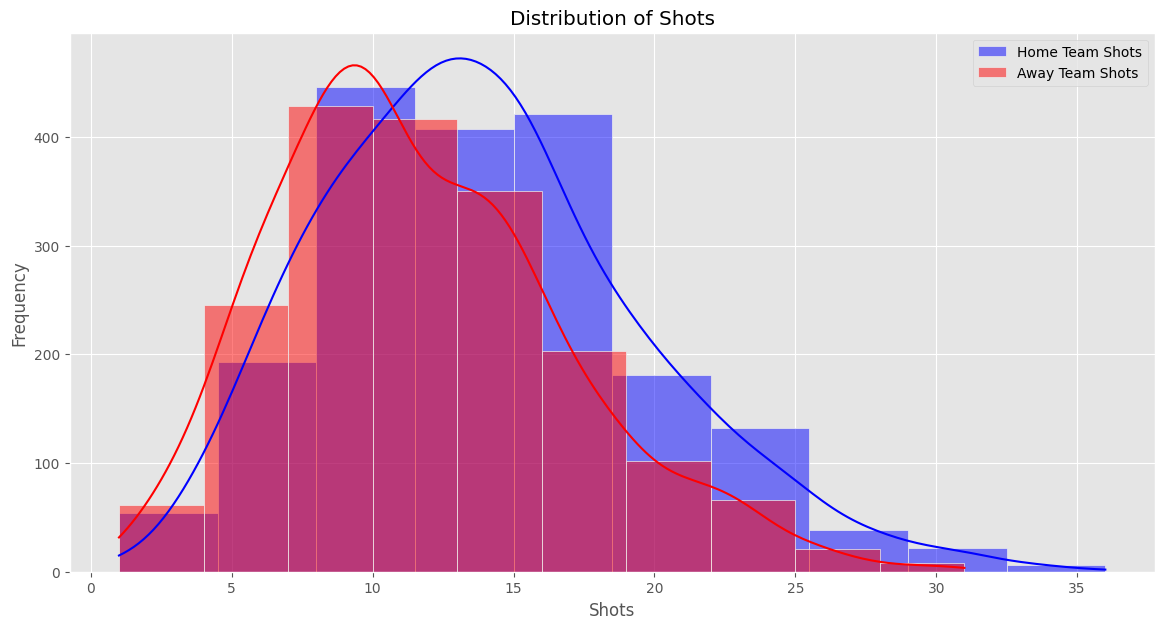

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['HS'], bins=10, kde=True, color='blue', label='Home Team Shots')
sns.histplot(English_Premier_League['AS'], bins=10, kde=True, color='red', label='Away Team Shots')
plt.title('Distribution of Shots')
plt.xlabel('Shots')
plt.ylabel('Frequency')
plt.legend()
plt.show()

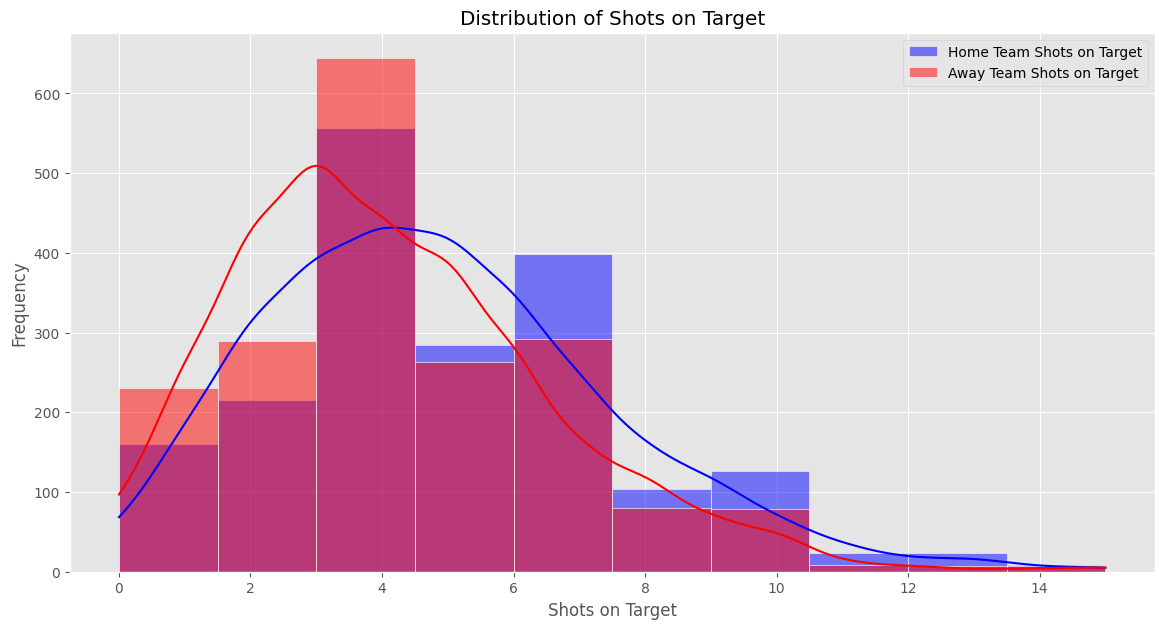

In [ ]:
# Shots on Target Analysis
plt.figure(figsize=(14, 7))
sns.histplot(English_Premier_League['HST'], bins=10, kde=True, color='blue', label='Home Team Shots on Target')
sns.histplot(English_Premier_League['AST'], bins=10, kde=True, color='red', label='Away Team Shots on Target')
plt.title('Distribution of Shots on Target')
plt.xlabel('Shots on Target')
plt.ylabel('Frequency')
plt.legend()
plt.show()

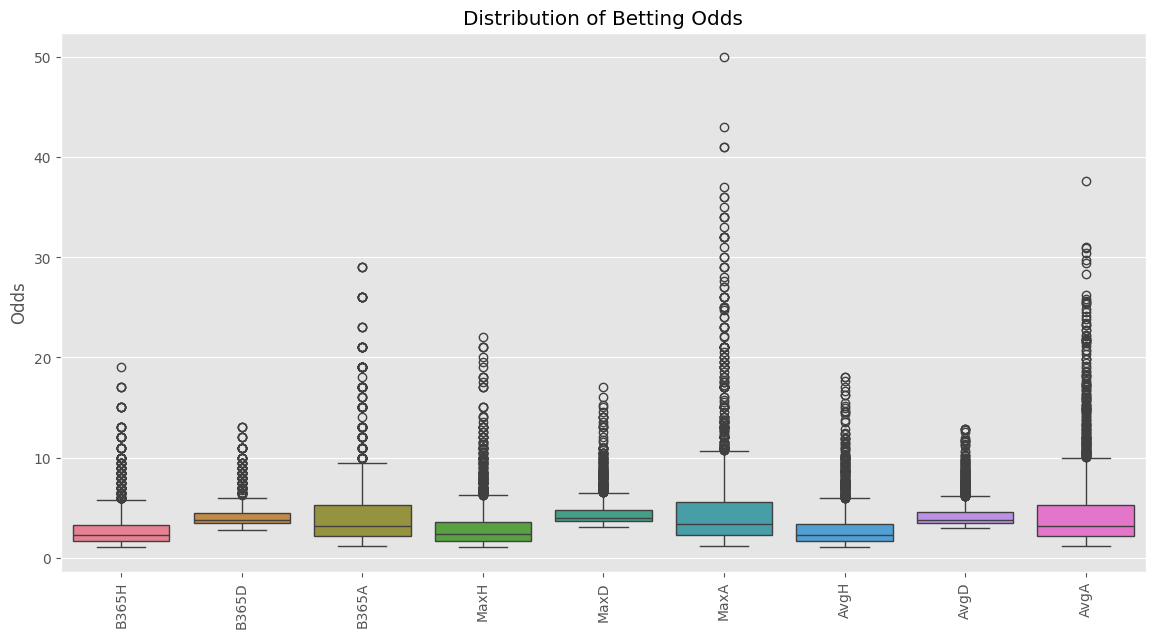

In [ ]:
# 4. Betting Odds Analysis
betting_cols = ['B365H', 'B365D', 'B365A', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
betting_data = English_Premier_League[betting_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=betting_data)
plt.title('Distribution of Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

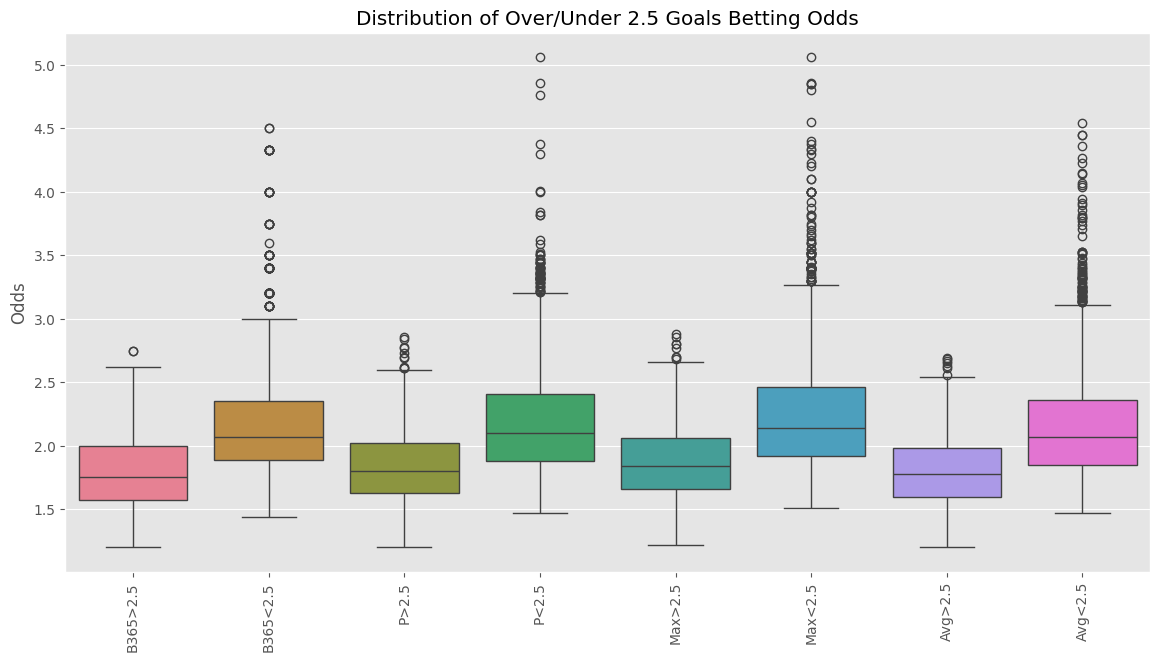

In [ ]:
#Over/Under Goals Analysis
over_under_cols = ['B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5']
over_under_data = English_Premier_League[over_under_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=over_under_data)
plt.title('Distribution of Over/Under 2.5 Goals Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

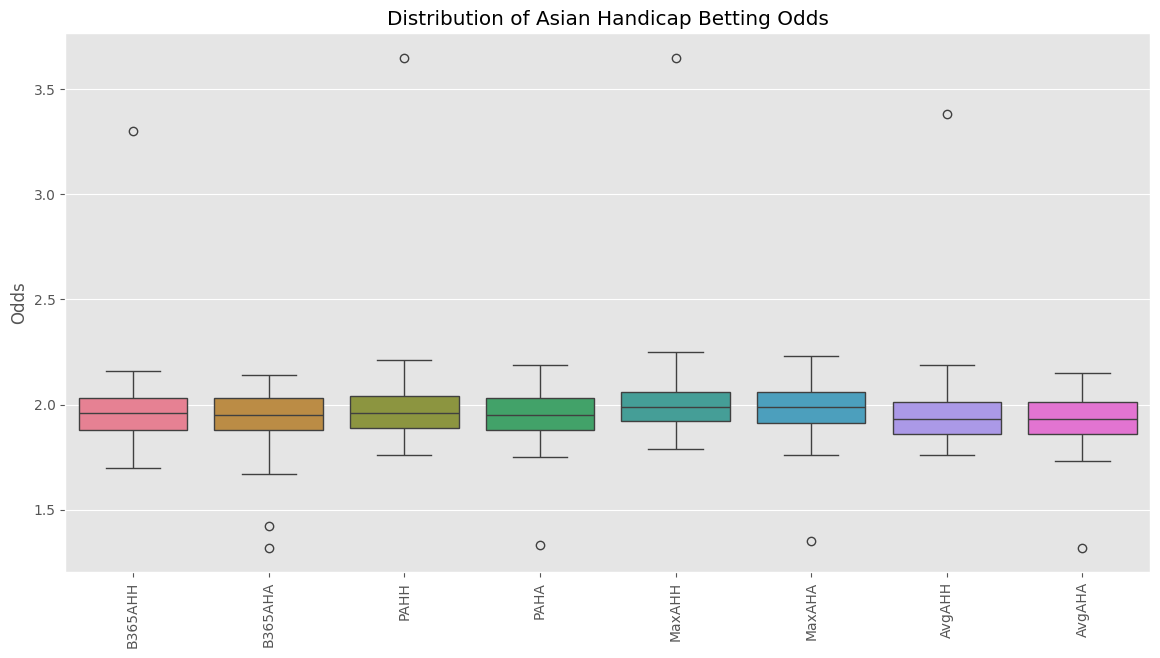

In [ ]:
# Asian Handicap Analysis
asian_handicap_cols = ['B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA']
asian_handicap_data = English_Premier_League[asian_handicap_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=asian_handicap_data)
plt.title('Distribution of Asian Handicap Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

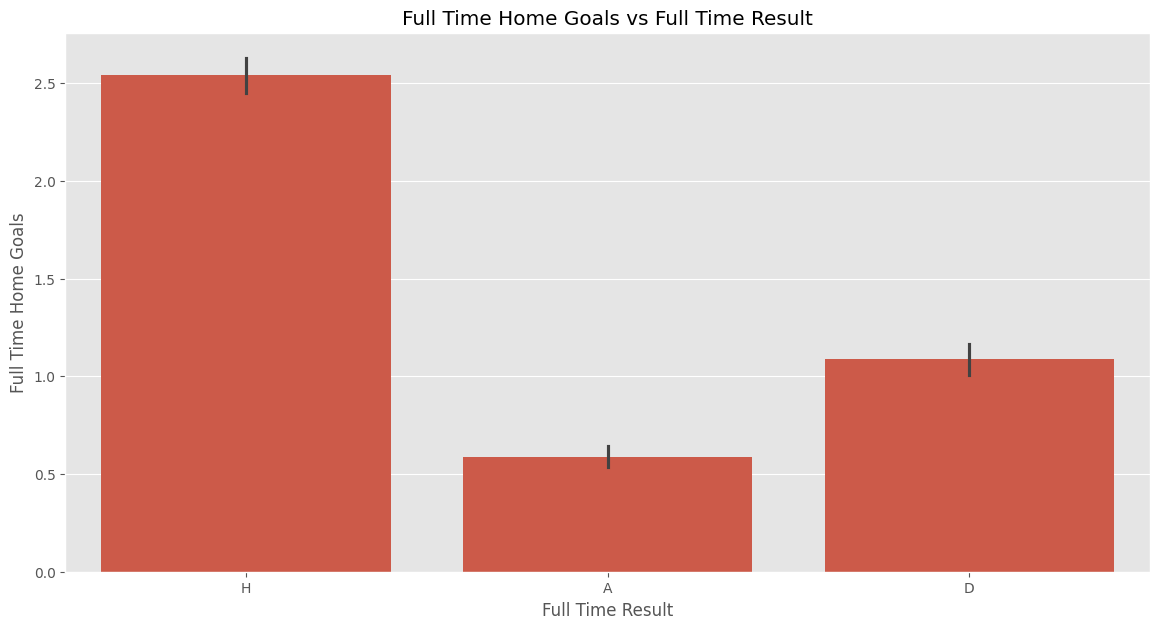

In [ ]:
# Goals vs FTR
plt.figure(figsize=(14, 7))
sns.barplot(x='FTR', y='FTHG', data=English_Premier_League)
plt.title('Full Time Home Goals vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Full Time Home Goals')
plt.show()

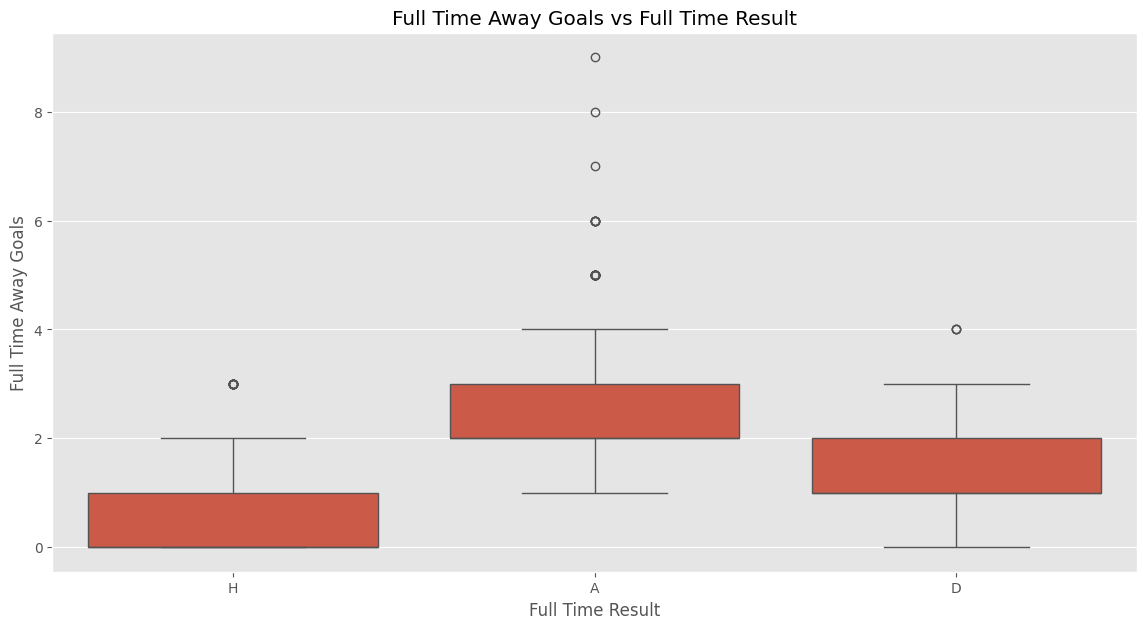

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='FTAG', data=English_Premier_League)
plt.title('Full Time Away Goals vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Full Time Away Goals')
plt.show()

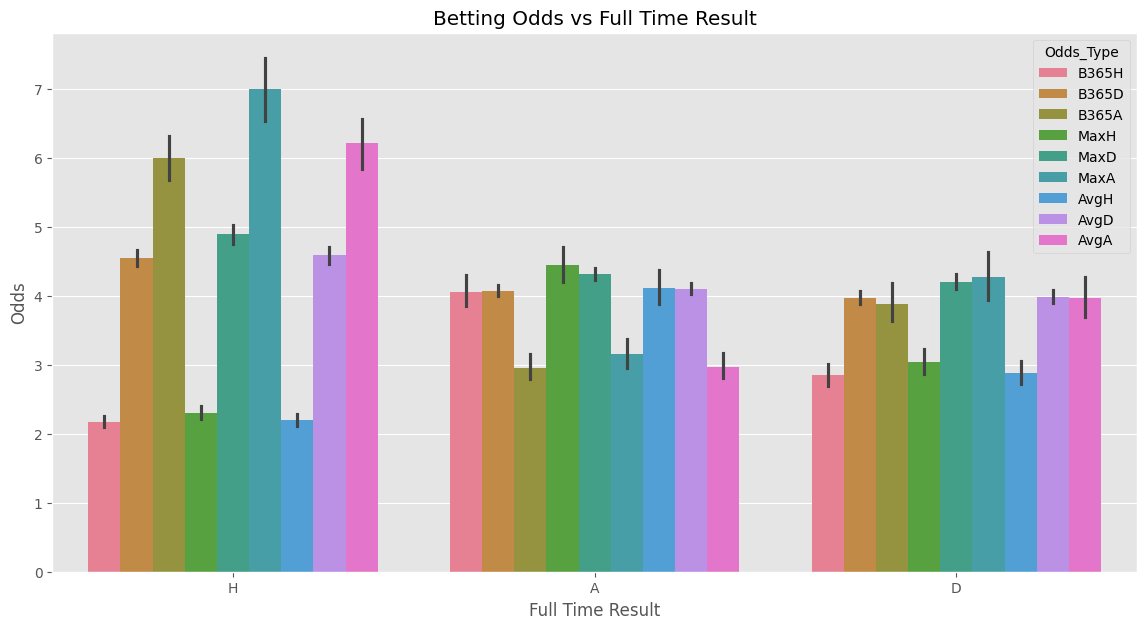

In [ ]:
# Betting Odds vs FTR
odds_cols = ['B365H', 'B365D', 'B365A', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
melted_df = English_Premier_League.melt(id_vars=['FTR'], value_vars=odds_cols, var_name='Odds_Type', value_name='Odds')

plt.figure(figsize=(14, 7))
sns.barplot(x='FTR', y='Odds', hue='Odds_Type', data=melted_df)
plt.title('Betting Odds vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Odds')
plt.show()

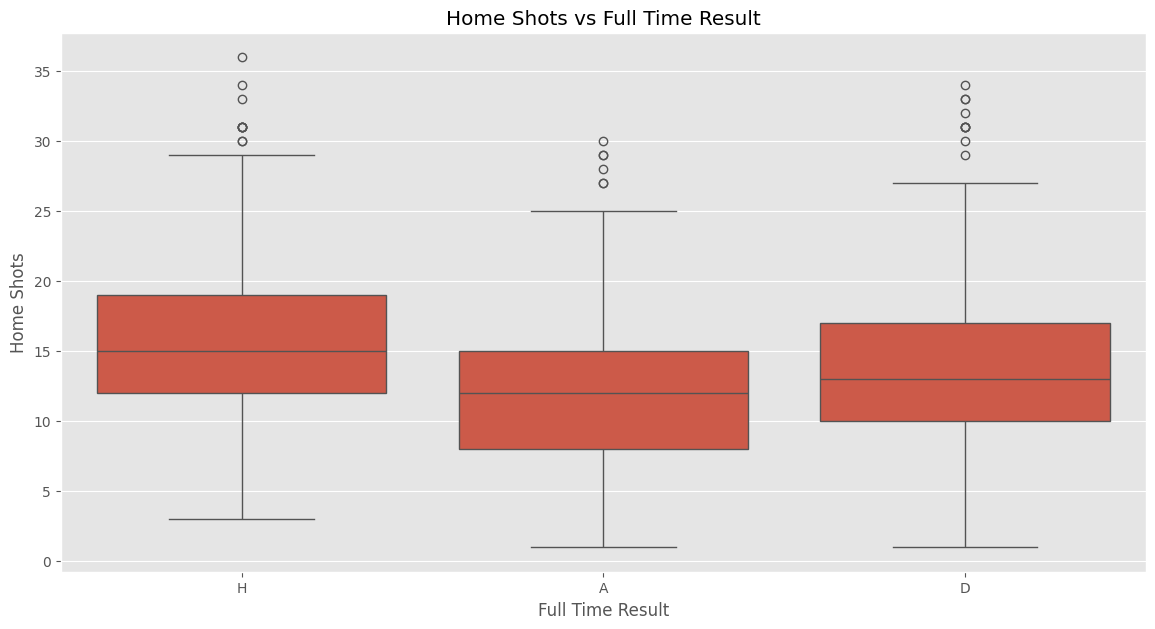

In [ ]:
# Shots vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='HS', data=English_Premier_League)
plt.title('Home Shots vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Shots')
plt.show()

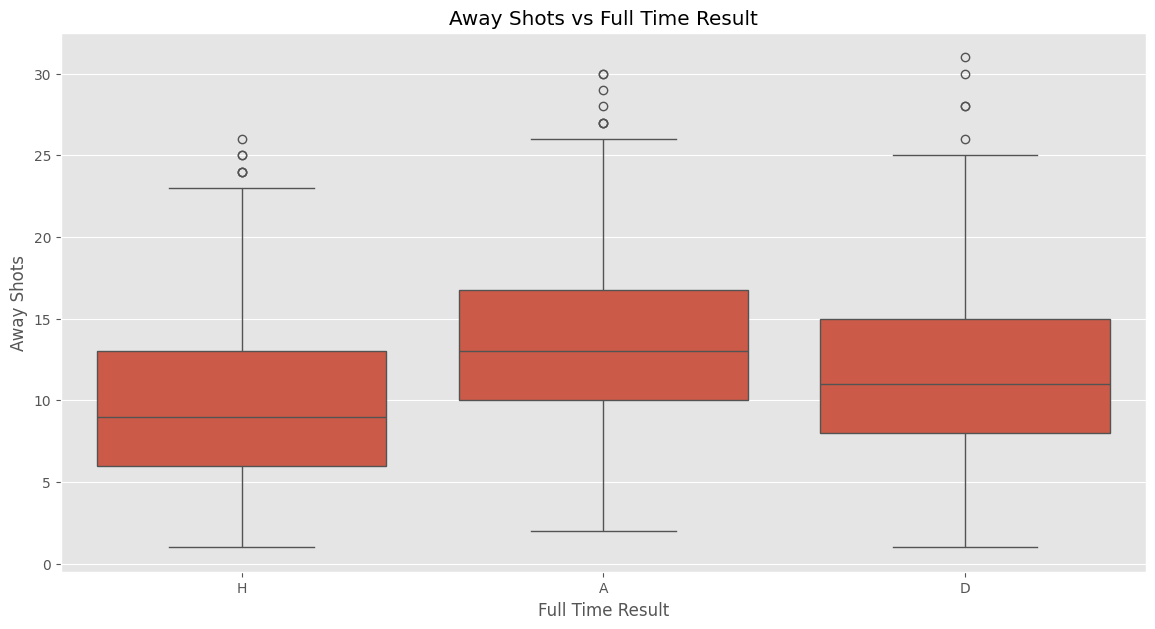

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='AS', data=English_Premier_League)
plt.title('Away Shots vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Shots')
plt.show()

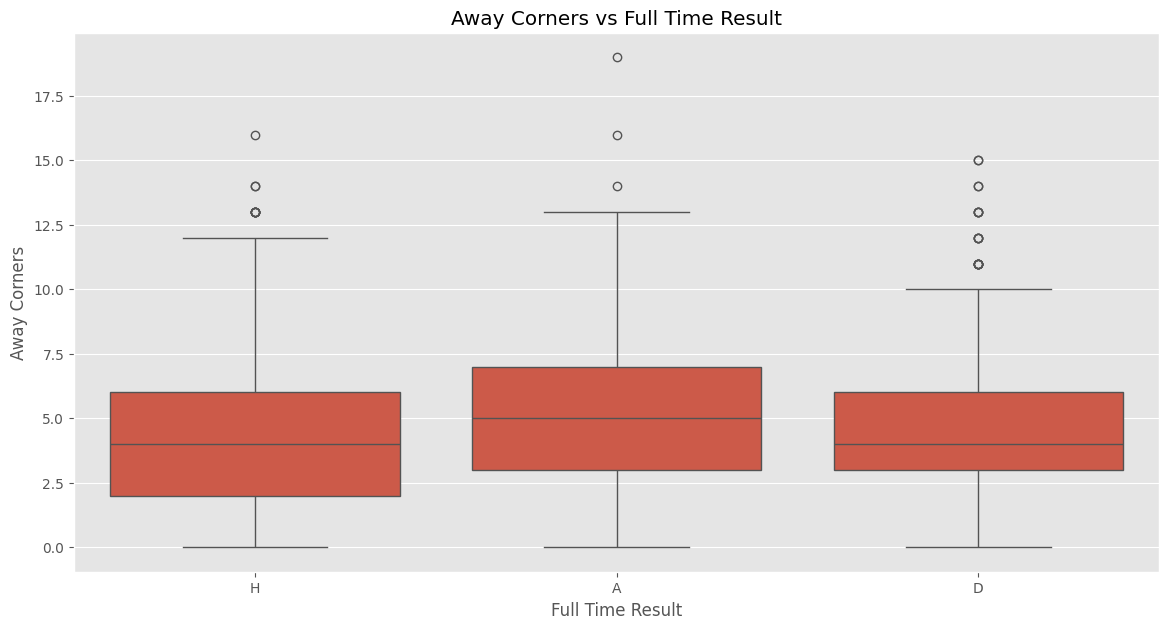

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='AC', data=English_Premier_League)
plt.title('Away Corners vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Corners')
plt.show()

In [ ]:
new_df = English_Premier_League.copy()

In [ ]:
new_df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.14,8.25,18.50,1.15,8.00,18.00,1.15,9.59,18.05,1.12,8.5,21.00,1.14,9.50,23.00,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,-2.25,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,1.14,9.50,21.00,1.14,9.00,20.00,1.15,8.00,18.00,1.14,10.43,19.63,1.11,9.5,21.00,1.14,9.50,23.00,1.16,10.50,23.00,1.14,9.52,19.18,1.30,3.50,1.34,3.44,1.36,3.76,1.32,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.50,5.75,1.26,11.00,6.10,1.25,11.68,6.53,1.26,13.00,6.0,1.24,12.00,6.50,1.25,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,1.75,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,12.00,7.00,1.25,11.00,6.00,1.26,11.00,6.10,1.25,11.11,6.68,1.27,11.00,6.5,1.24,12.00,6.50,1.25,13.00,7.00,1.29,11.14,6.46,1.26,1.40,3.00,1.43,3.03,1.50,3.22,1.41,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,1.95,3.60,3.90,1.97,3.55,3.80,2.04,3.57,3.90,2.00,3.5,3.80,2.00,3.60,4.00,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,-0.50,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,1.95,3.70,4.20,1.95,3.60,3.90,1.97,3.55,3.85,1.98,3.67,4.06,1.95,3.6,3.90,2.00,3.60,4.00,2.03,3.70,4.20,1.98,3.58,3.96,1.90,1.90,1.94,1.97,1.97,1.98,1.91,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.65,3.20,2.75,2.65,3.20,2.75,2.71,3.31,2.81,2.70,3.2,2.75,2.70,3.30,2.80,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,0.00,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,2.70,3.25,2.90,2.65,3.10,2.85,2.60,3.20,2.85,2.71,3.19,2.90,2.62,3.2,2.80,2.70,3.25,2.90,2.72,3.26,2.95,2.65,3.18,2.88,2.10,1.72,2.19,1.76,2.25,1.78,2.17,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.20,3.20,2.35,3.10,3.20,2.40,3.21,3.37,2.39,3.10,3.3,2.35,3.20,3.30,2.45,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,0.25,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,3.40,3.50,2.25,3.30,3.30,2.25,3.40,3.30,2.20,3.37,3.45,2.27,3.30,3.3,2.25,3.40,3.30,2.25,3.55,3.50,2.34,3.41,3.37,2.23,2.20,1.66,2.22,1.74,2.28,1.77,2.17,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,E0,19/05/2024,16:00,Crystal Palace,Aston Villa,5,0,H,2,0,H,D Bond,15,8,9,2,10,8,2,4,1,4,0,0,1.85,4.33,3.60,1.88,4.10,3.50,NaN,NaN,NaN,1.83,4.37,3.74,1.85,4.2,3.50,1.80,4.00,3.70,1.93,4.50,3.84,1.87,4.28,3.67,1.40,3.00,1.39,3.05,1.42,3.12,1.39,2.96,-0.50,1.87,2.03,1.84,2.06,1.90,2.06,1.85,2.02,1.57,4.50,4.75,1.61,4.33,4.80,NaN,NaN,NaN,1.63,4.64,4.99,1.73,4.4,4.75,1.60,4.40,5.00,1.75,4.67,5.00,1.66,4.49,4.68,1.44,2.75,1.49,2.74,1

In [ ]:
new_df.columns = [i.lower() for i in new_df.columns]
new_df["date"] = pd.to_datetime(new_df["date"], format="%d/%m/%Y")
result_data = new_df[["div", "date", "time", "hometeam", "awayteam", "fthg", "ftag", "ftr", "hthg", "htag", "htr"]]

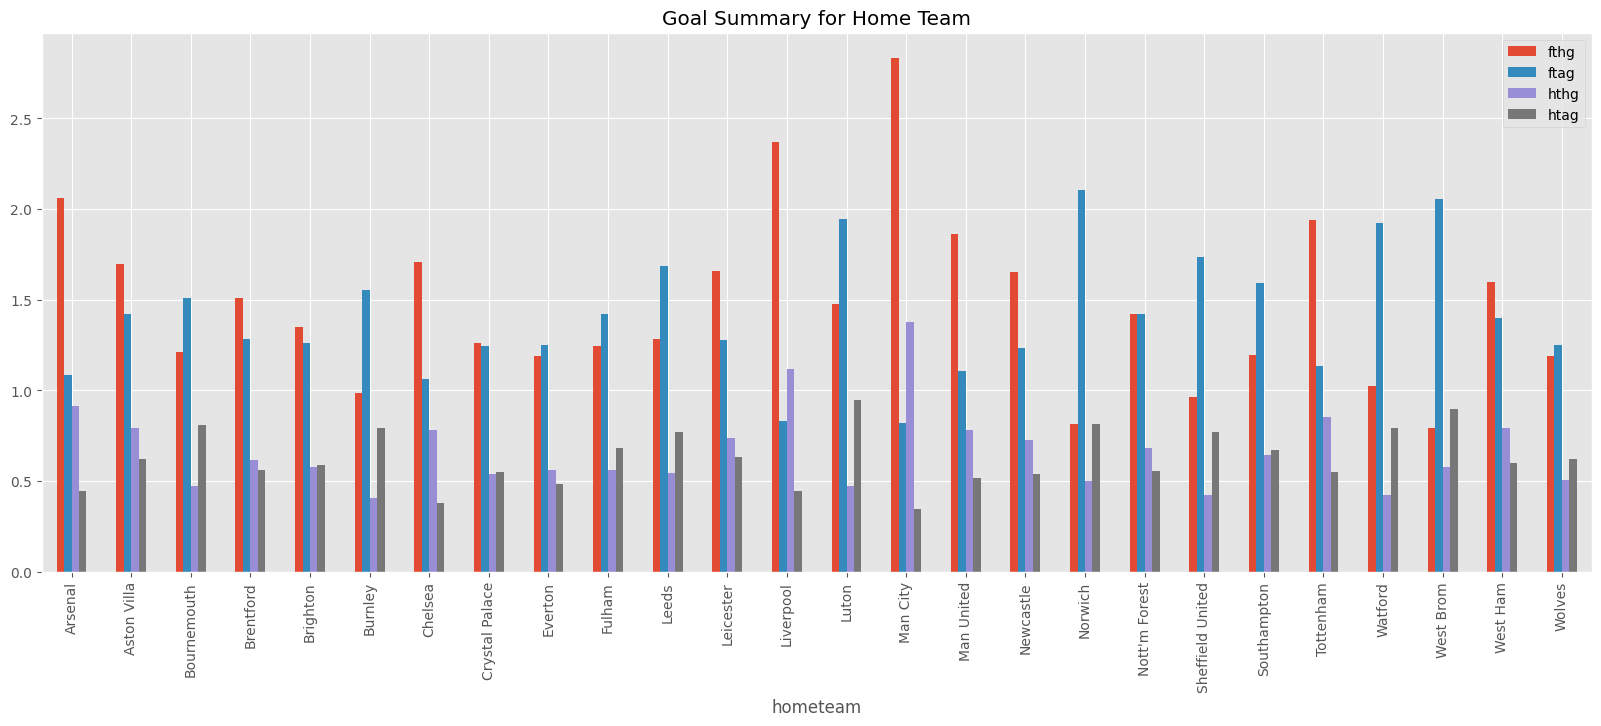

In [ ]:
result_data.groupby("hometeam")[[ "fthg", "ftag", "hthg", "htag"]].mean().plot(kind="bar",
                                                                               figsize=(20, 7),
                                                                               title="Goal Summary for Home Team")
plt.show()

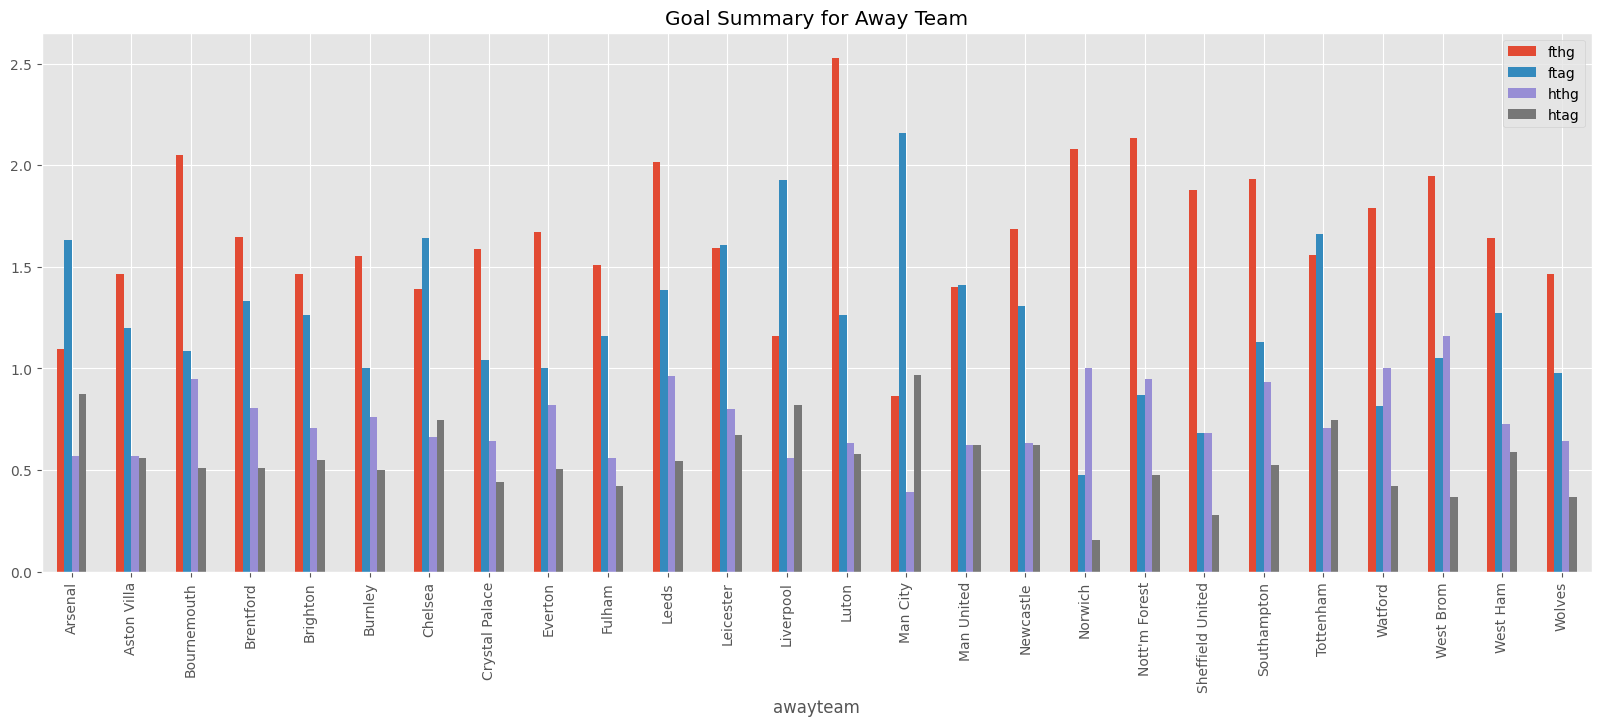

In [ ]:
result_data.groupby("awayteam")[[ "fthg", "ftag", "hthg", "htag"]].mean().plot(kind="bar",
                                                                               figsize=(20, 7),
                                                                               title="Goal Summary for Away Team")
plt.show()

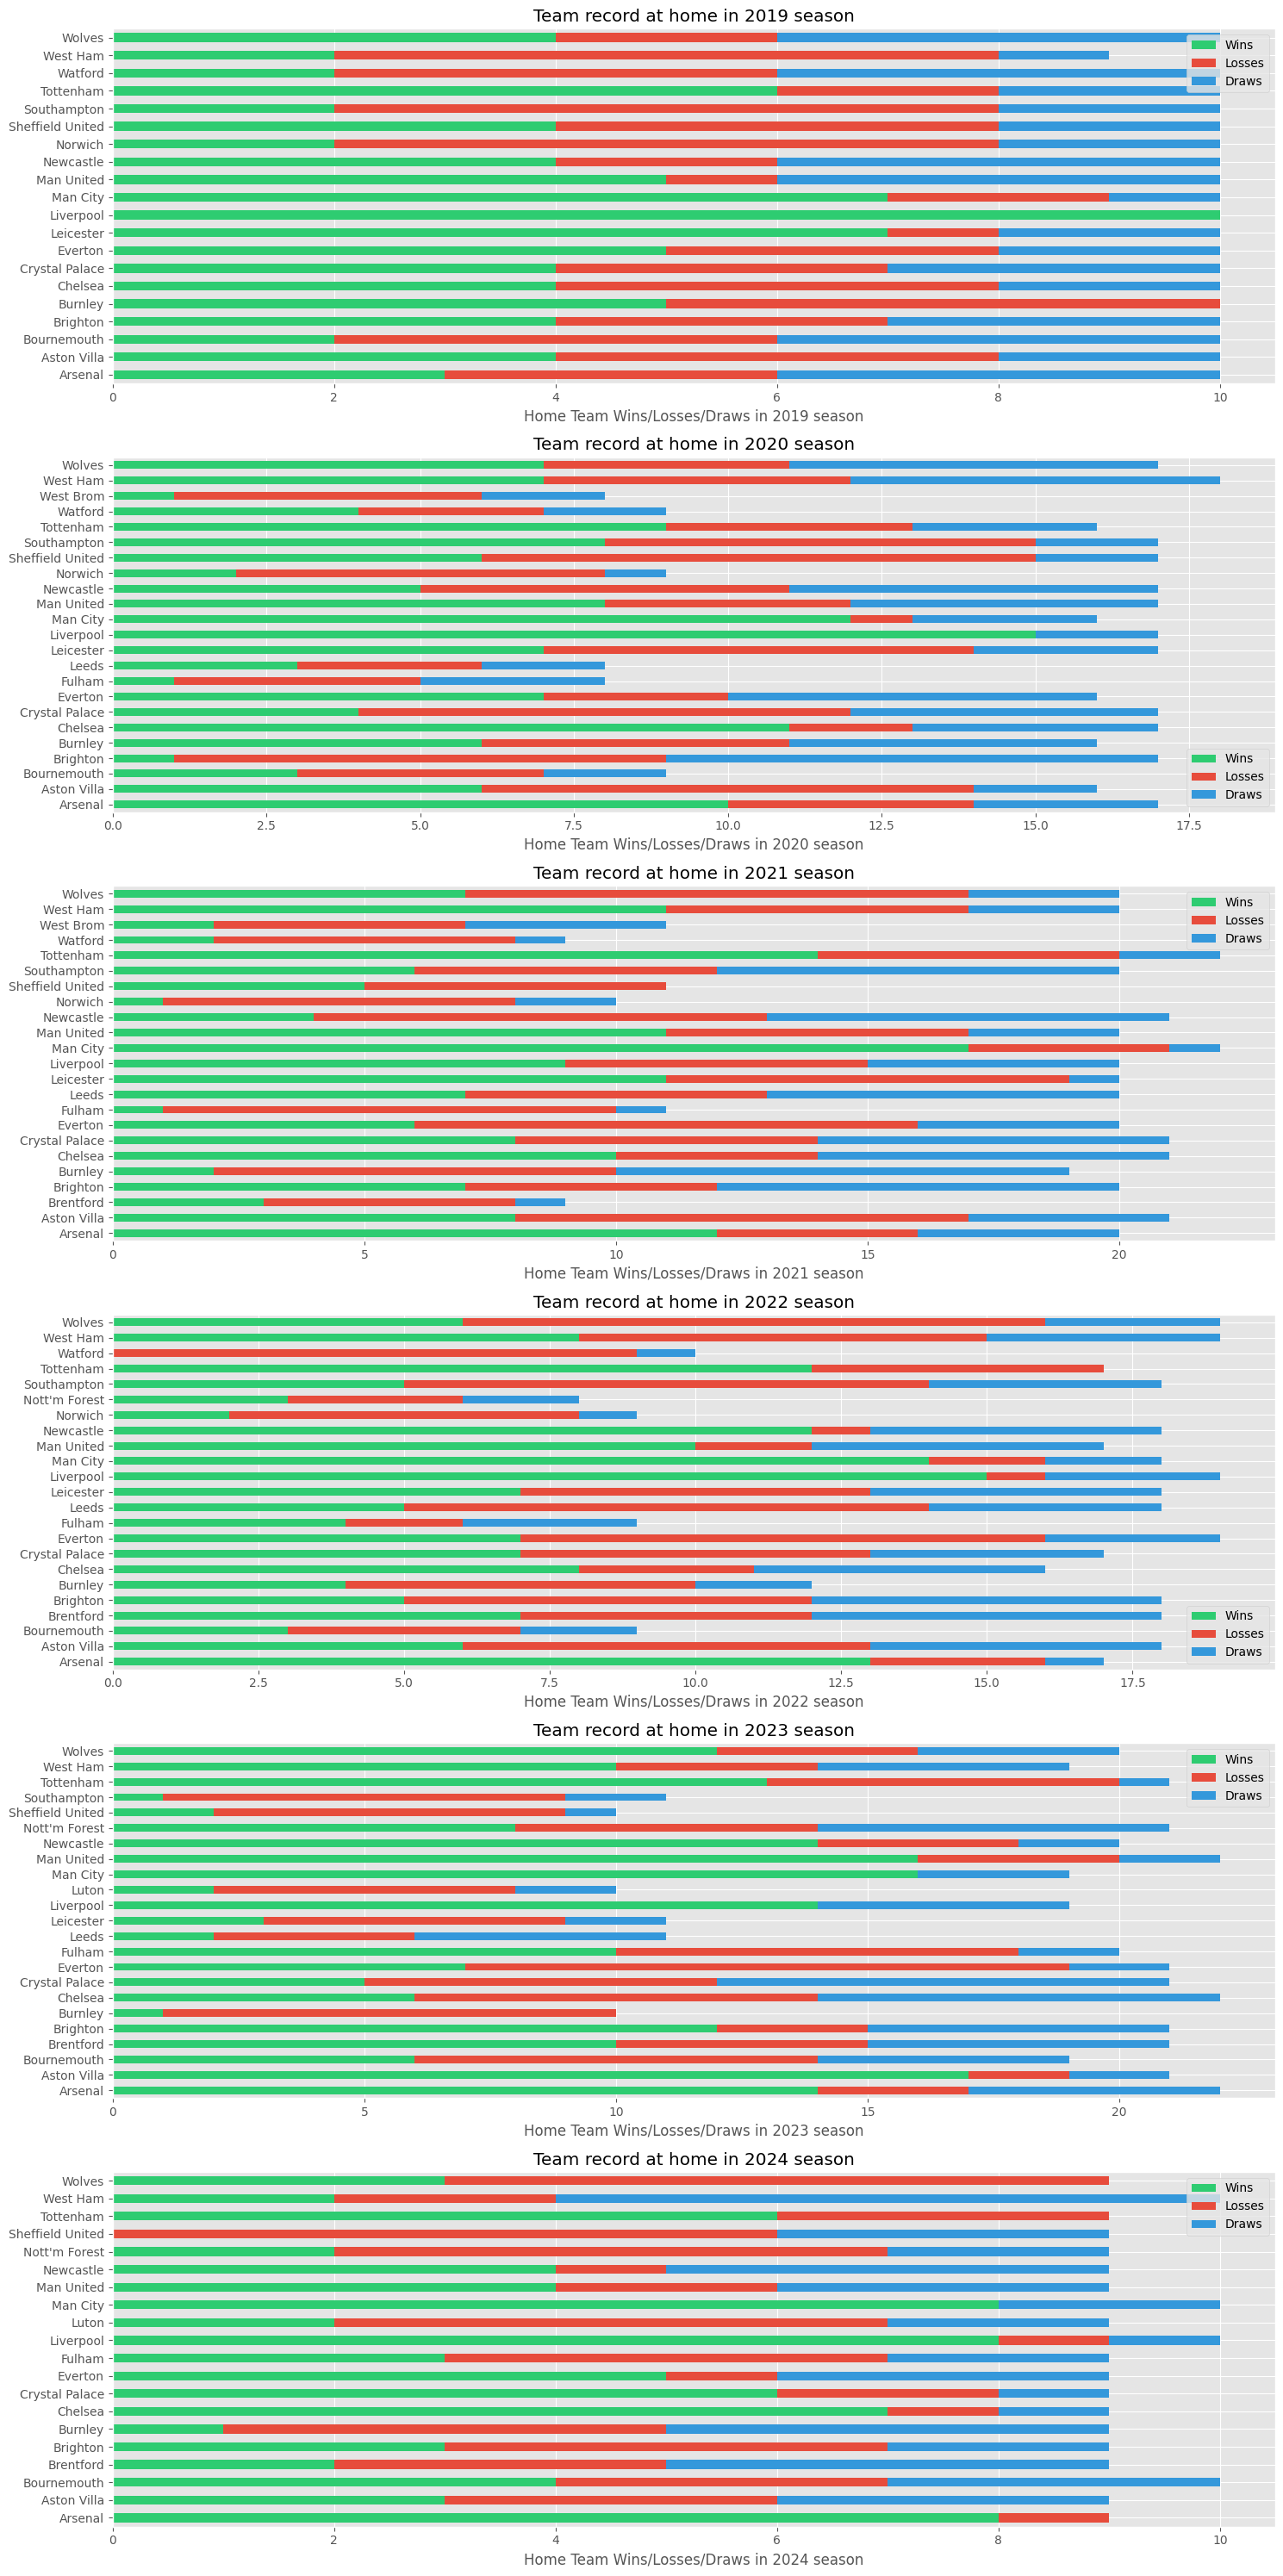

In [ ]:
result_data['year'] = pd.to_datetime(result_data['date']).dt.year

home_result = result_data.groupby(['hometeam', 'year', 'ftr']).size().unstack(fill_value=0).reset_index()
home_result.columns.name = None
home_result = home_result.rename(columns={'H': 'Wins', 'A': 'Losses', 'D': 'Draws'})
home_result['NumOfGames'] = home_result[['Wins', 'Losses', 'Draws']].sum(axis=1)

years = home_result['year'].unique()

colors = ['#2ecc71', '#e74c3c', '#3498db']

fig, ax1 = plt.subplots(len(years), 1)
fig.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    year_data = home_result[home_result['year'] == year]
    year_data.set_index('hometeam')[['Wins', 'Losses', 'Draws']].plot(kind='barh', stacked=True, ax=ax1[i], color=colors)
    ax1[i].set_title(f'Team record at home in {year} season')
    ax1[i].set_xlabel(f'Home Team Wins/Losses/Draws in {year} season')
    ax1[i].set_ylabel('')

plt.tight_layout()
plt.show()

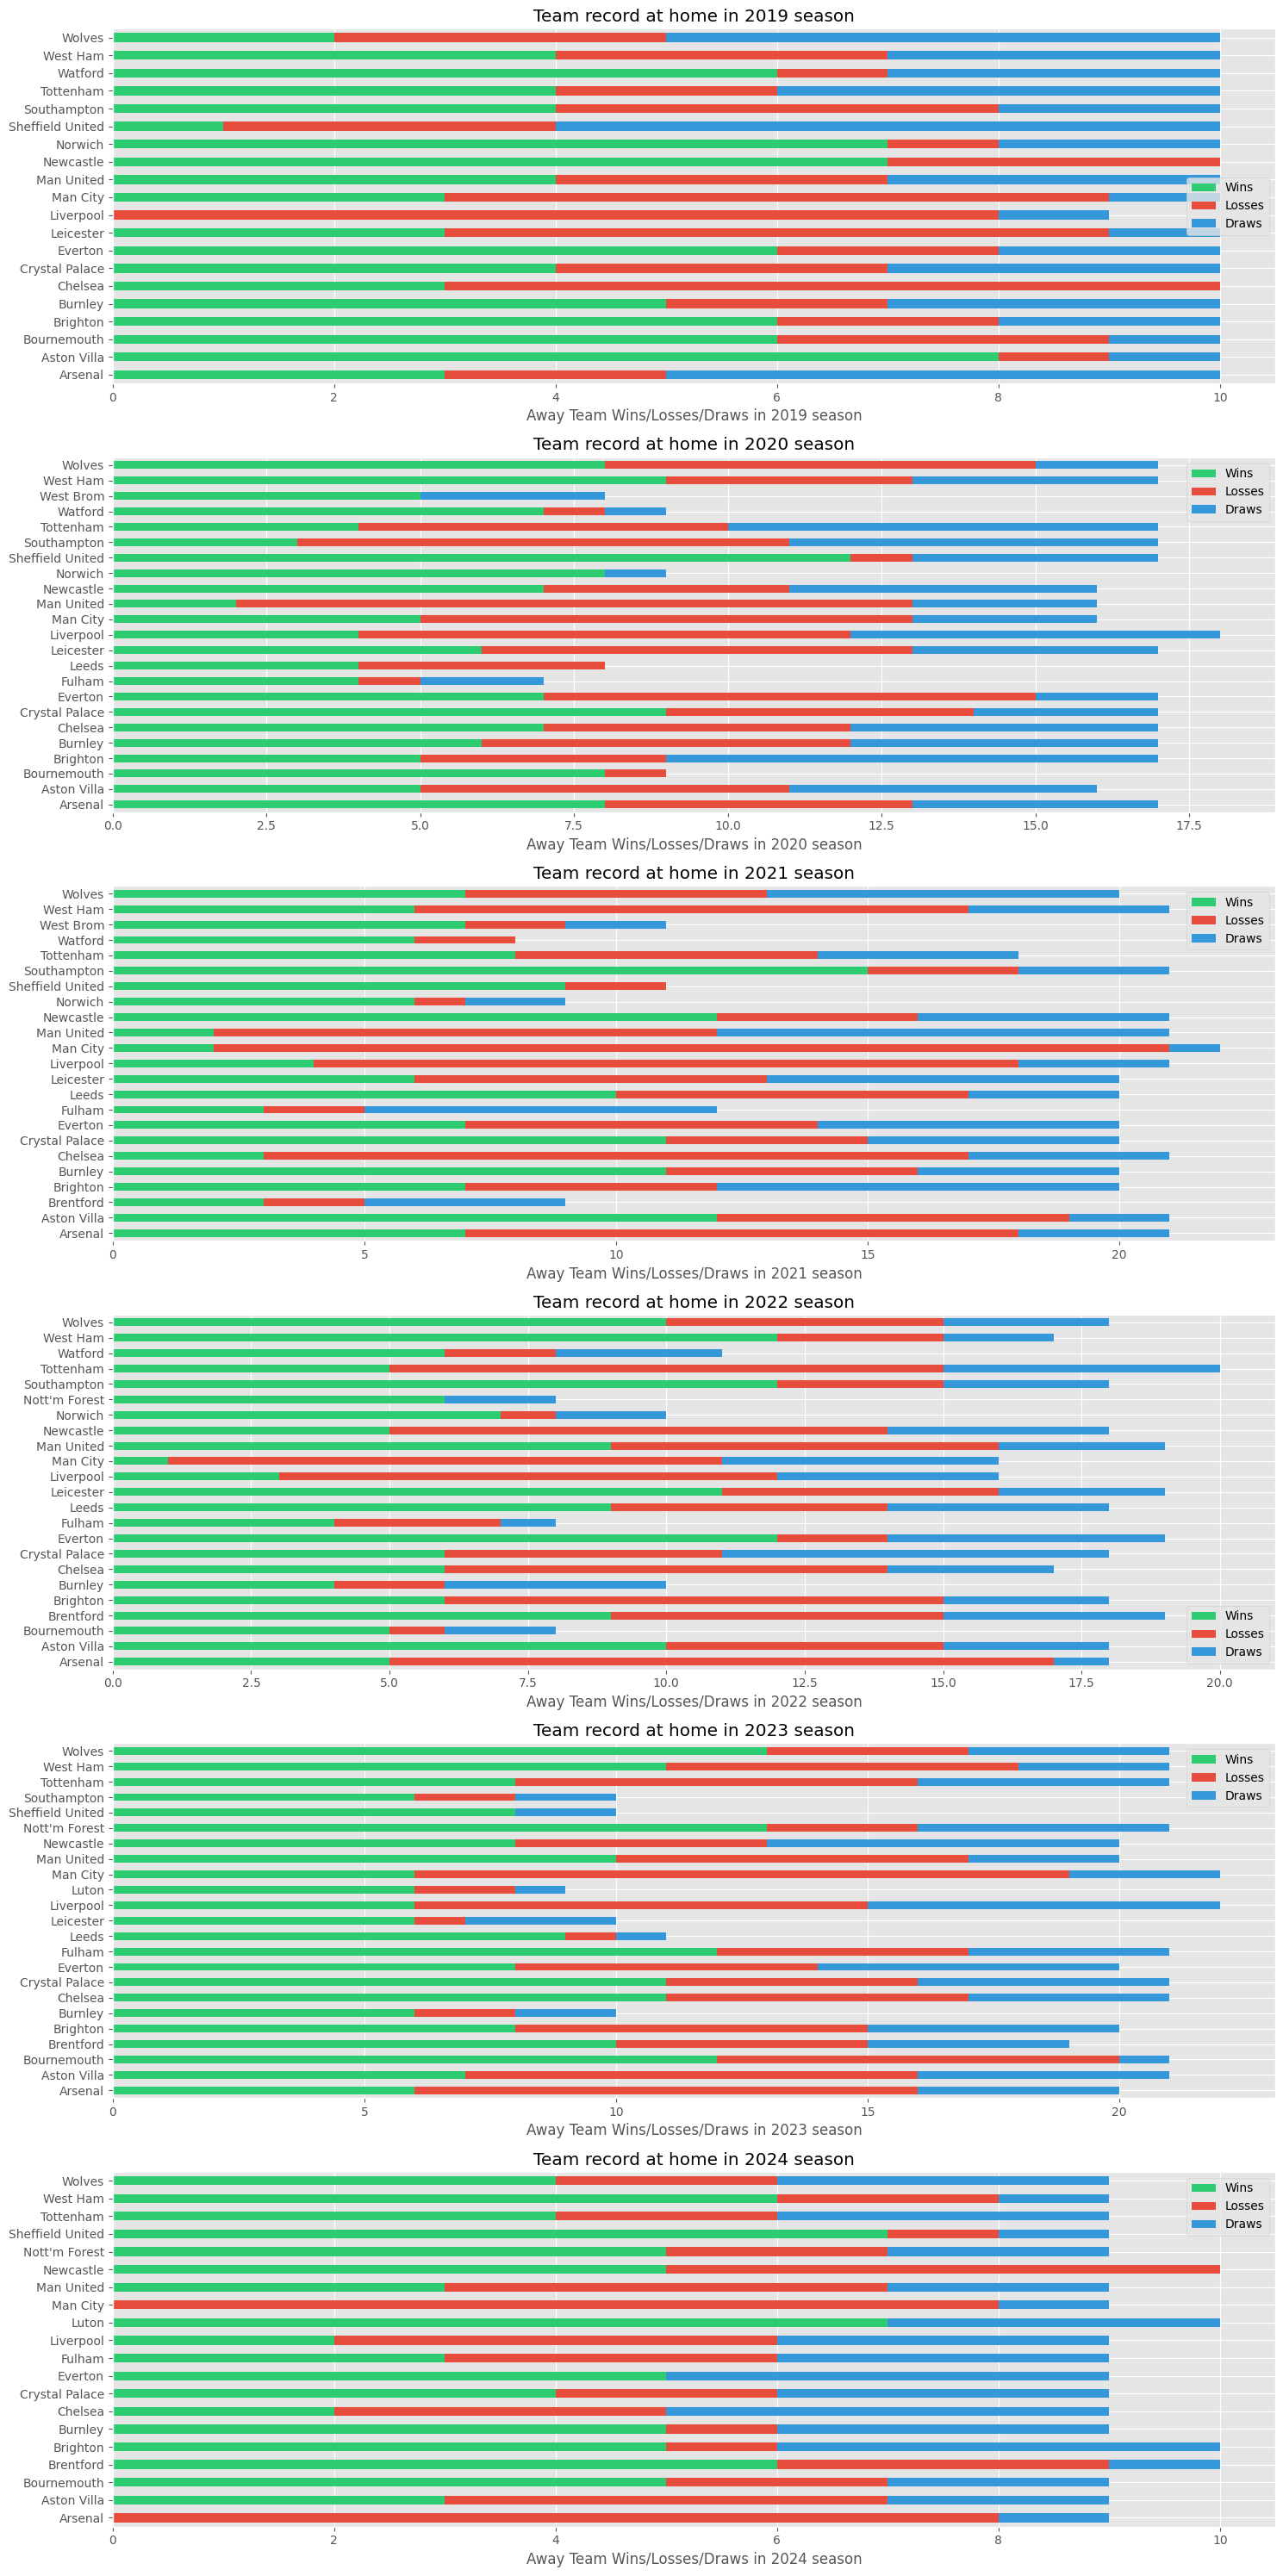

In [ ]:
result_data['year'] = pd.to_datetime(result_data['date']).dt.year

home_result = result_data.groupby(['awayteam', 'year', 'ftr']).size().unstack(fill_value=0).reset_index()
home_result.columns.name = None
home_result = home_result.rename(columns={'H': 'Wins', 'A': 'Losses', 'D': 'Draws'})
home_result['NumOfGames'] = home_result[['Wins', 'Losses', 'Draws']].sum(axis=1)

years = home_result['year'].unique()

colors = ['#2ecc71', '#e74c3c', '#3498db']

fig, ax1 = plt.subplots(len(years), 1)
fig.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    year_data = home_result[home_result['year'] == year]
    year_data.set_index('awayteam')[['Wins', 'Losses', 'Draws']].plot(kind='barh', stacked=True, ax=ax1[i], color=colors)
    ax1[i].set_title(f'Team record at home in {year} season')
    ax1[i].set_xlabel(f'Away Team Wins/Losses/Draws in {year} season')
    ax1[i].set_ylabel('')

plt.tight_layout()
plt.show()

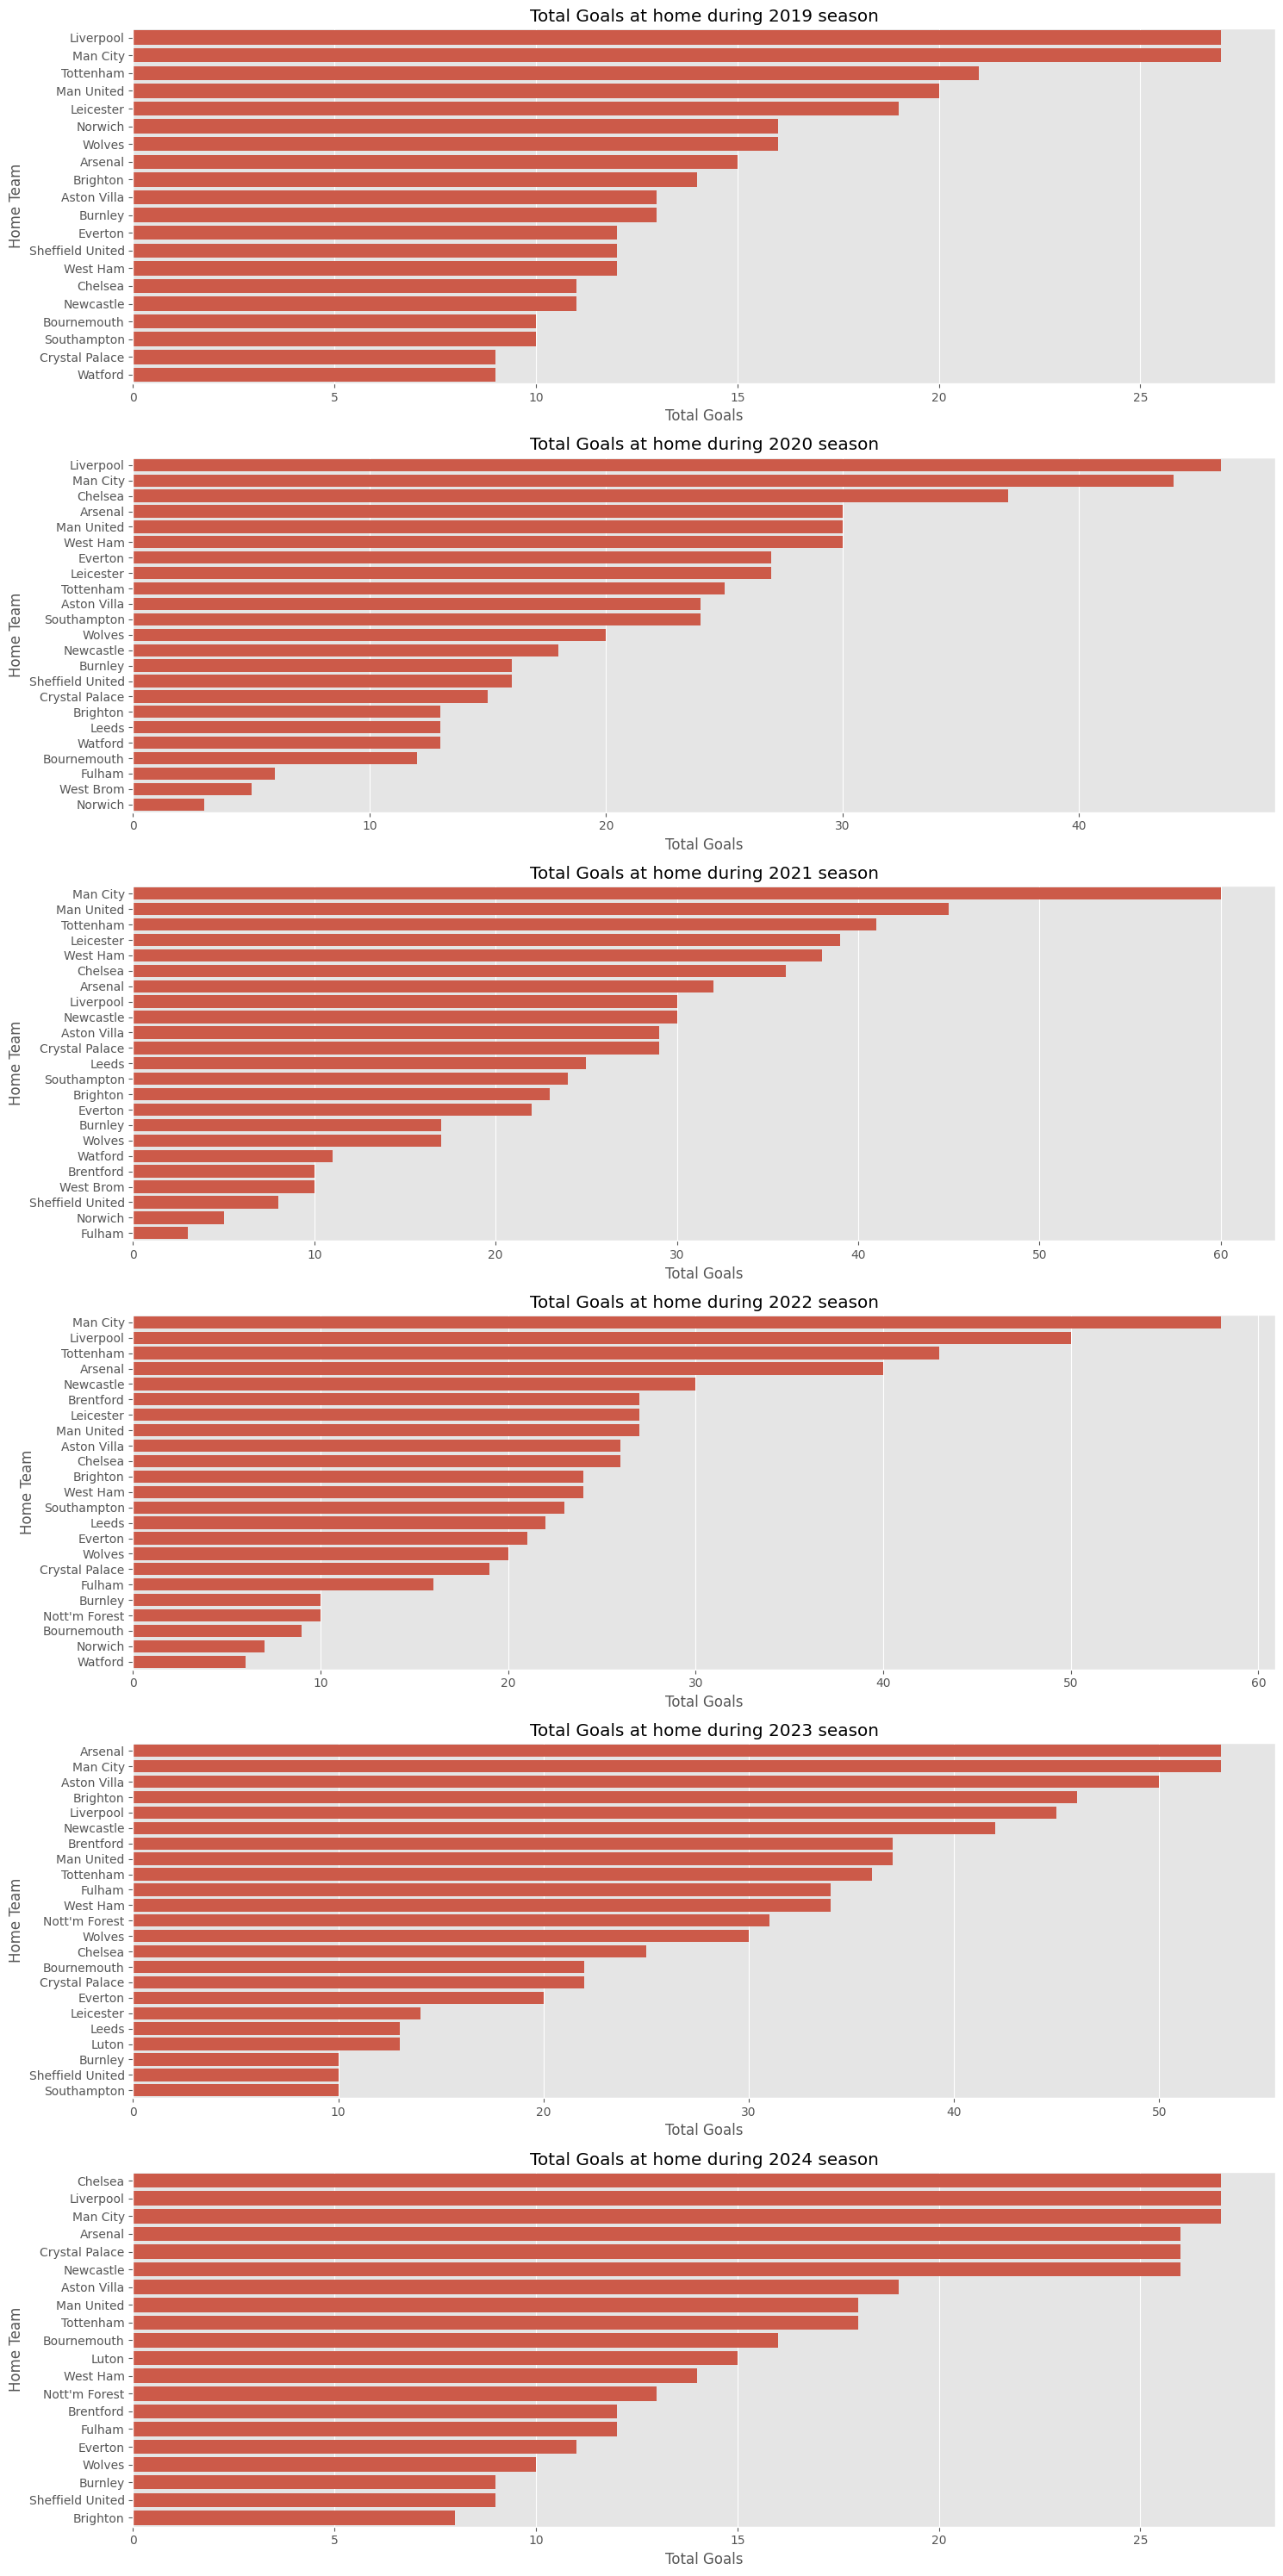

In [ ]:
result_data = result_data.rename(columns={'hometeam': 'home_team', 'fthg': 'home_goals'})
result_csv_goals_hometeam = result_data.groupby(['year', 'home_team'])['home_goals'].sum().reset_index()
result_csv_goals_hometeam = result_csv_goals_hometeam.sort_values(by=['year', 'home_goals'], ascending=[True, False])

fig2, ax3 = plt.subplots(len(years), 1)
fig2.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    sns.barplot(data=result_csv_goals_hometeam[result_csv_goals_hometeam['year'] == year], x='home_goals', y='home_team', ax=ax3[i])
    ax3[i].set_title(f'Total Goals at home during {year} season')
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("Home Team")

plt.tight_layout()
plt.show()

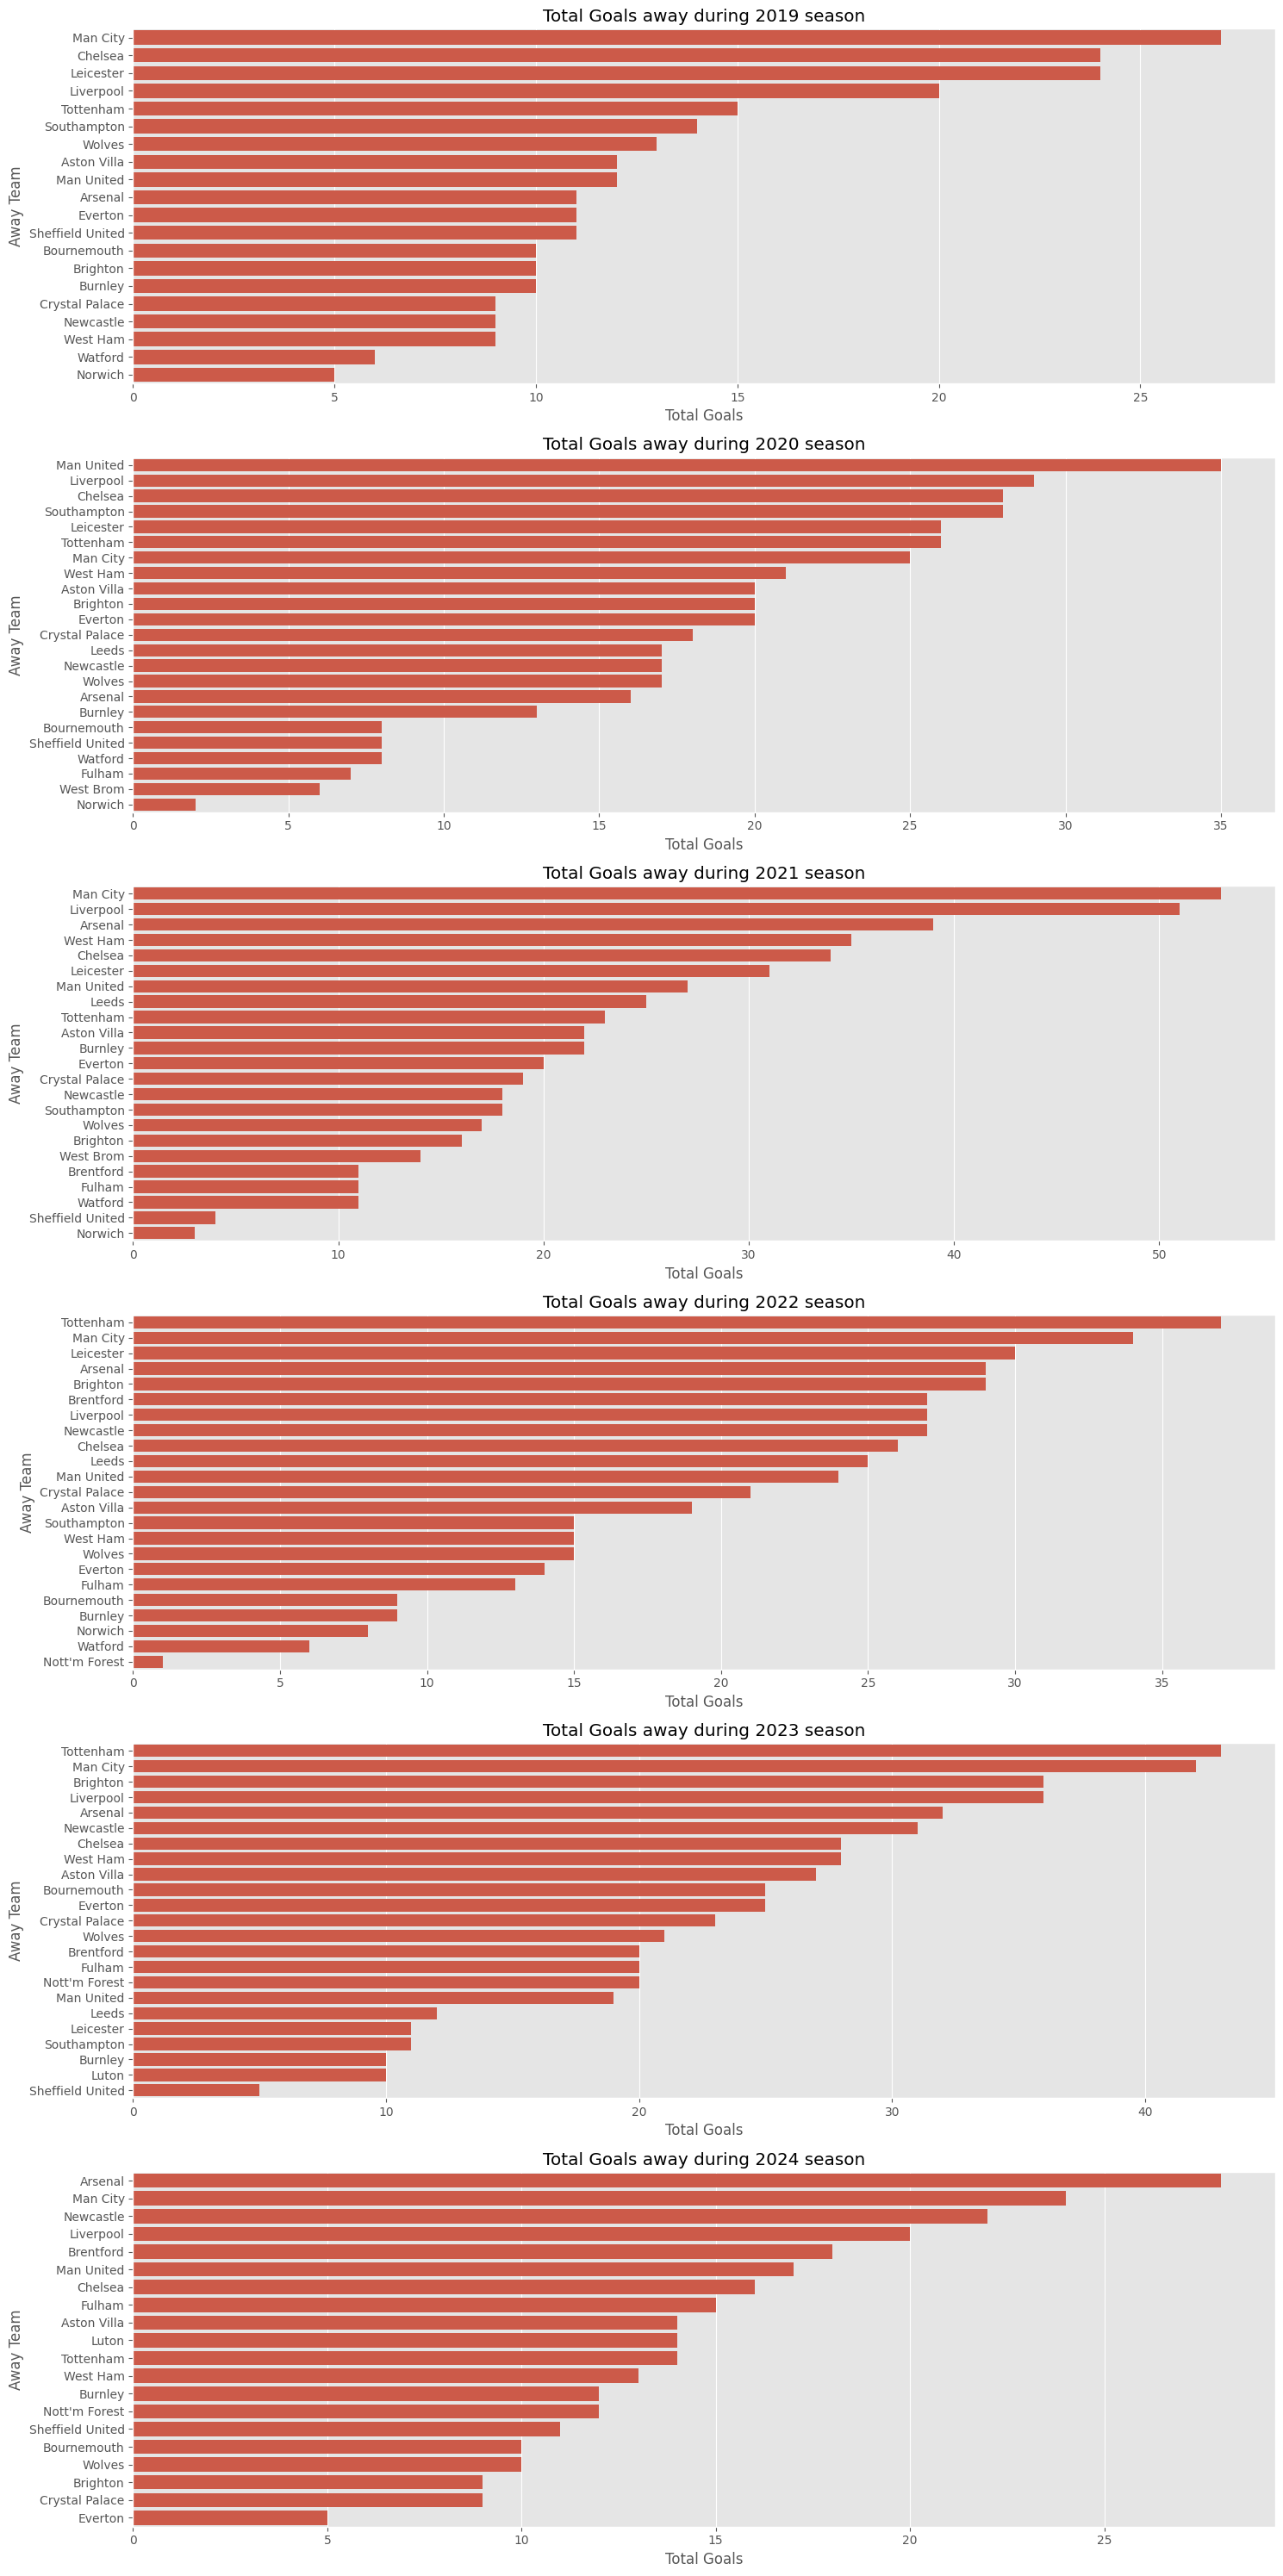

In [ ]:
result_data = result_data.rename(columns={'awayteam': 'away_team', 'ftag': 'away_goals'})
result_csv_goals_awayteam = result_data.groupby(['year', 'away_team'])['away_goals'].sum().reset_index()
result_csv_goals_awayteam = result_csv_goals_awayteam.sort_values(by=['year', 'away_goals'], ascending=[True, False])

fig2, ax3 = plt.subplots(len(years), 1)
fig2.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    sns.barplot(data=result_csv_goals_awayteam[result_csv_goals_awayteam['year'] == year], x='away_goals', y='away_team', ax=ax3[i])
    ax3[i].set_title(f'Total Goals away during {year} season')
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("Away Team")

plt.tight_layout()
plt.show()

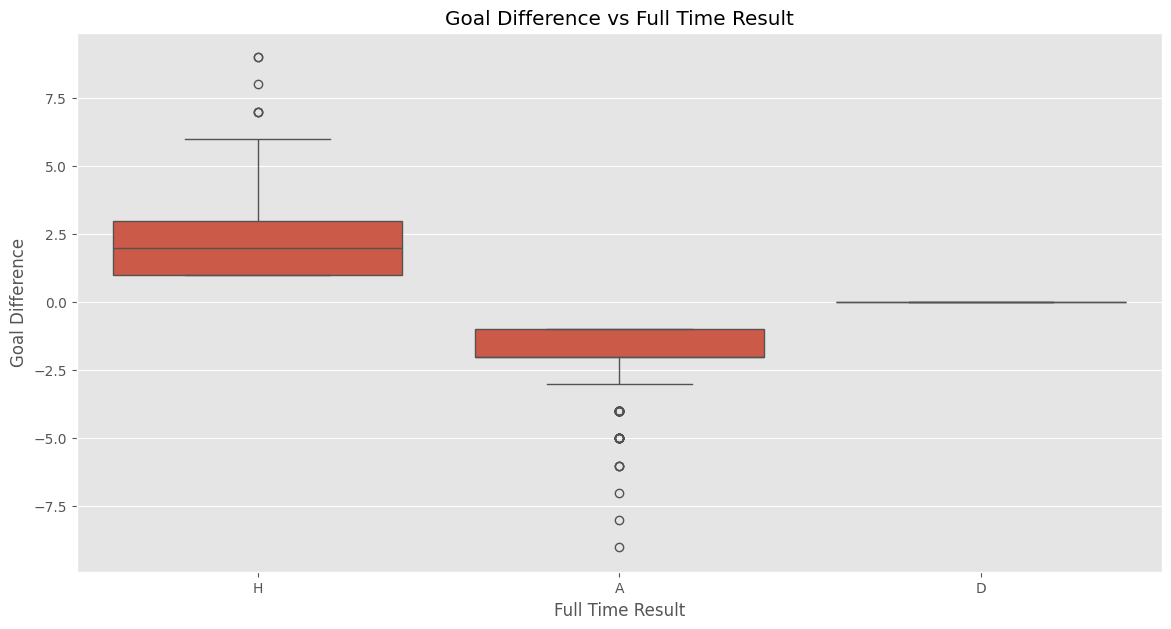

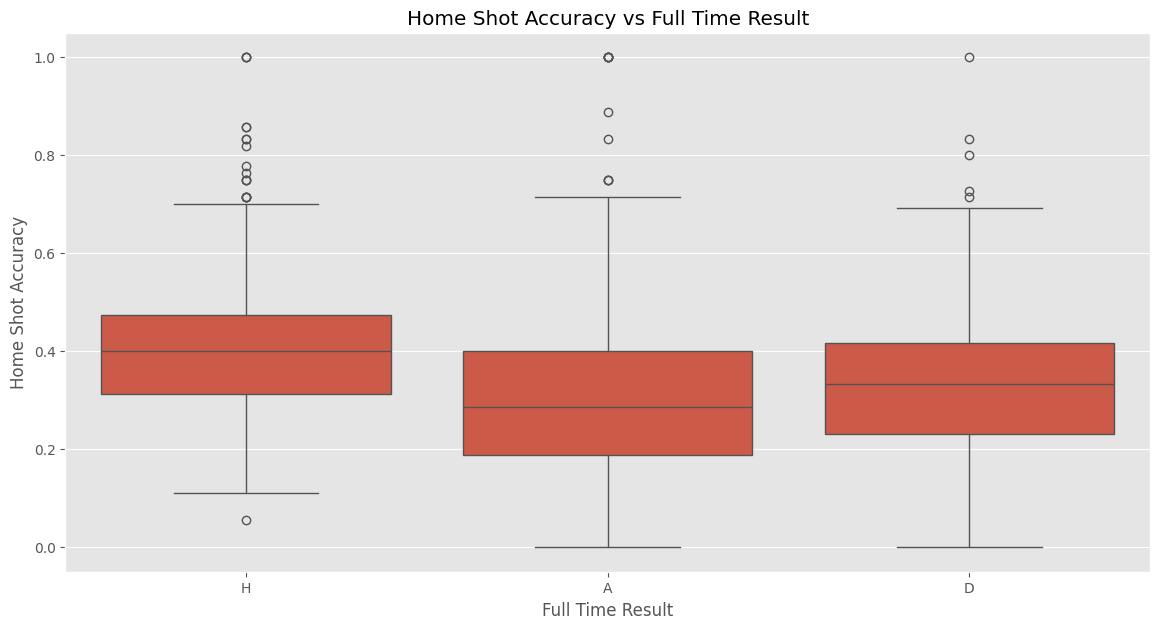

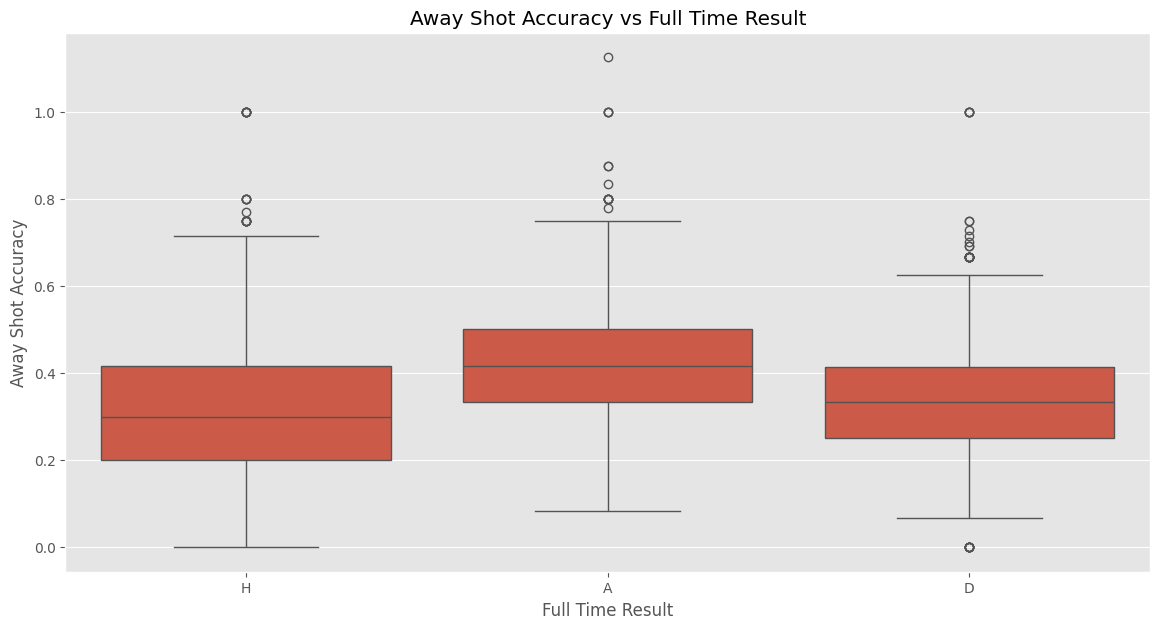

In [ ]:
# Goal Difference
English_Premier_League['Goal_Diff'] = English_Premier_League['FTHG'] - English_Premier_League['FTAG']

# Shot Accuracy
English_Premier_League['Home_Shot_Accuracy'] = English_Premier_League['HST'] / English_Premier_League['HS']
English_Premier_League['Away_Shot_Accuracy'] = English_Premier_League['AST'] / English_Premier_League['AS']

# Goal Difference vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Goal_Diff', data=English_Premier_League)
plt.title('Goal Difference vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Goal Difference')
plt.show()

# Shot Accuracy vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Home_Shot_Accuracy', data=English_Premier_League)
plt.title('Home Shot Accuracy vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Shot Accuracy')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Away_Shot_Accuracy', data=English_Premier_League)
plt.title('Away Shot Accuracy vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Shot Accuracy')
plt.show()

In [ ]:
English_Premier_League.shape

(1900, 109)

In [ ]:
!pip install xgboost lightgbm imbalanced-learn seaborn

In [ ]:
!pip install --upgrade scikit-learn numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install --user --upgrade scikit-learn numpy

  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)


In [ ]:
English_Premier_League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 1.5+ MB


In [ ]:
English_Premier_League

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.14,8.25,18.50,1.15,8.00,18.00,1.15,9.59,18.05,1.12,8.5,21.00,1.14,9.50,23.00,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,-2.25,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,1.14,9.50,21.00,1.14,9.00,20.00,1.15,8.00,18.00,1.14,10.43,19.63,1.11,9.5,21.00,1.14,9.50,23.00,1.16,10.50,23.00,1.14,9.52,19.18,1.30,3.50,1.34,3.44,1.36,3.76,1.32,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.50,5.75,1.26,11.00,6.10,1.25,11.68,6.53,1.26,13.00,6.0,1.24,12.00,6.50,1.25,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,1.75,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,12.00,7.00,1.25,11.00,6.00,1.26,11.00,6.10,1.25,11.11,6.68,1.27,11.00,6.5,1.24,12.00,6.50,1.25,13.00,7.00,1.29,11.14,6.46,1.26,1.40,3.00,1.43,3.03,1.50,3.22,1.41,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,1.95,3.60,3.90,1.97,3.55,3.80,2.04,3.57,3.90,2.00,3.5,3.80,2.00,3.60,4.00,2.06,3.65,4.00,2.01,3.53,3.83,1.90,1.90,1.96,1.96,2.00,1.99,1.90,1.93,-0.50,2.01,1.89,2.04,1.88,2.04,1.91,2.00,1.88,1.95,3.70,4.20,1.95,3.60,3.90,1.97,3.55,3.85,1.98,3.67,4.06,1.95,3.6,3.90,2.00,3.60,4.00,2.03,3.70,4.20,1.98,3.58,3.96,1.90,1.90,1.94,1.97,1.97,1.98,1.91,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,G Scott,10,11,4,3,6,12,2,7,0,0,0,0,2.62,3.20,2.75,2.65,3.20,2.75,2.65,3.20,2.75,2.71,3.31,2.81,2.70,3.2,2.75,2.70,3.30,2.80,2.80,3.33,2.85,2.68,3.22,2.78,2.10,1.72,2.17,1.77,2.20,1.78,2.12,1.73,0.00,1.92,1.98,1.93,2.00,1.94,2.00,1.91,1.98,2.70,3.25,2.90,2.65,3.10,2.85,2.60,3.20,2.85,2.71,3.19,2.90,2.62,3.2,2.80,2.70,3.25,2.90,2.72,3.26,2.95,2.65,3.18,2.88,2.10,1.72,2.19,1.76,2.25,1.78,2.17,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,J Moss,6,10,2,3,16,14,6,2,2,1,0,1,3.00,3.25,2.37,3.20,3.20,2.35,3.10,3.20,2.40,3.21,3.37,2.39,3.10,3.3,2.35,3.20,3.30,2.45,3.21,3.40,2.52,3.13,3.27,2.40,2.20,1.66,2.23,1.74,2.25,1.74,2.18,1.70,0.25,1.85,2.05,1.88,2.05,1.88,2.09,1.84,2.04,3.40,3.50,2.25,3.30,3.30,2.25,3.40,3.30,2.20,3.37,3.45,2.27,3.30,3.3,2.25,3.40,3.30,2.25,3.55,3.50,2.34,3.41,3.37,2.23,2.20,1.66,2.22,1.74,2.28,1.77,2.17,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,E0,19/05/2024,16:00,Crystal Palace,Aston Villa,5,0,H,2,0,H,D Bond,15,8,9,2,10,8,2,4,1,4,0,0,1.85,4.33,3.60,1.88,4.10,3.50,NaN,NaN,NaN,1.83,4.37,3.74,1.85,4.2,3.50,1.80,4.00,3.70,1.93,4.50,3.84,1.87,4.28,3.67,1.40,3.00,1.39,3.05,1.42,3.12,1.39,2.96,-0.50,1.87,2.03,1.84,2.06,1.90,2.06,1.85,2.02,1.57,4.50,4.75,1.61,4.33,4.80,NaN,NaN,NaN,1.63,4.64,4.99,1.73,4.4,4.75,1.60,4.40,5.00,1.75,4.67,5.00,1.66,4.49,4.68,1.44,2.75,1.49,2.74,1

In [ ]:
# Drop the specified columns
columns_to_drop = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR']
English_Premier_League = English_Premier_League.drop(columns=columns_to_drop)

In [ ]:
# Drop the specified columns
columns_to_drop =['BWCA',	'IWCH','IWCD','PSCD','PSCH','WHCH','WHCD','WHCA',	'VCCH',	'VCCD',	'VCCA','MaxCH',
'MaxCD','MaxCA','AvgCH','AvgCD','AvgCA','B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','MaxC>2.5',
'MaxC<2.5','AvgC>2.5','AvgC<2.5','AHCh','B365CAHH','B365CAHA','PCAHH','PCAHA','MaxCAHH','MaxCAHA','AvgCAHH','AvgCAHA']
English_Premier_League = English_Premier_League.drop(columns=columns_to_drop)

In [ ]:
English_Premier_League

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,IWCA,PSCH
0,0,173,20,12,17,2,21,15,12,7,5,9,9,11,2,0,2,0,0,18.00,1.14
1,0,188,1,24,14,0,19,5,14,3,9,6,13,1,1,2,2,0,0,1.25,11.11
2,0,188,7,2,19,1,15,13,8,3,3,10,19,3,4,2,1,0,0,3.85,1.98
3,0,188,7,5,20,2,9,10,11,4,3,6,12,2,7,0,0,0,0,2.85,2.71
4,0,188,7,7,8,1,13,6,10,2,3,16,14,6,2,2,1,0,1,2.20,3.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,376,10,7,1,2,6,15,8,9,2,10,8,2,4,1,4,0,0,3.20,1.63
1896,0,376,10,12,25,2,4,36,4,14,3,14,11,10,2,1,1,0,1,3.20,1.13
1897,0,376,10,13,9,0,20,15,15,6,7,15,20,4,4,5,4,0,0,3.20,3.11
1898,0,376,10,14,24,2,10,28,3,12,2,3,12,11,2,0,1,0,0,3.20,1.07


In [ ]:
# Drop the specified columns
columns_to_drop = ['IWCA', 'PSCH']
English_Premier_League = English_Premier_League.drop(columns=columns_to_drop)

In [ ]:
English_Premier_League

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,173,20,12,17,2,21,15,12,7,5,9,9,11,2,0,2,0,0
1,0,188,1,24,14,0,19,5,14,3,9,6,13,1,1,2,2,0,0
2,0,188,7,2,19,1,15,13,8,3,3,10,19,3,4,2,1,0,0
3,0,188,7,5,20,2,9,10,11,4,3,6,12,2,7,0,0,0,0
4,0,188,7,7,8,1,13,6,10,2,3,16,14,6,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,376,10,7,1,2,6,15,8,9,2,10,8,2,4,1,4,0,0
1896,0,376,10,12,25,2,4,36,4,14,3,14,11,10,2,1,1,0,1
1897,0,376,10,13,9,0,20,15,15,6,7,15,20,4,4,5,4,0,0
1898,0,376,10,14,24,2,10,28,3,12,2,3,12,11,2,0,1,0,0


In [ ]:
# Apply label encoding on object features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in English_Premier_League.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    English_Premier_League[column] = label_encoders[column].fit_transform(English_Premier_League[column])


In [ ]:
# Step 2: Extract correlation values for 'FTR' column
correlation_matrix = English_Premier_League.corr()

# Step 2: Extract correlation values for 'FTR' column
ftr_correlations = correlation_matrix['FTR']

# Step 3: Sort these correlation values in descending order by their absolute values
sorted_ftr_correlations = ftr_correlations.abs().sort_values(ascending=False)

# Step 4: Select the top 10 columns
top_10_columns = sorted_ftr_correlations.index[1:11]  # Skipping the first one because it will be 'FTR' itself

# Display the top 10 columns with their correlation values
top_10_ftr_correlations = ftr_correlations[top_10_columns]
print(top_10_ftr_correlations)


AST       -0.442296
HST        0.438003
AS        -0.307184
HS         0.262781
HR        -0.113237
AC        -0.092526
AR         0.091353
HC         0.085353
HY        -0.072235
Referee    0.060130
Name: FTR, dtype: float64


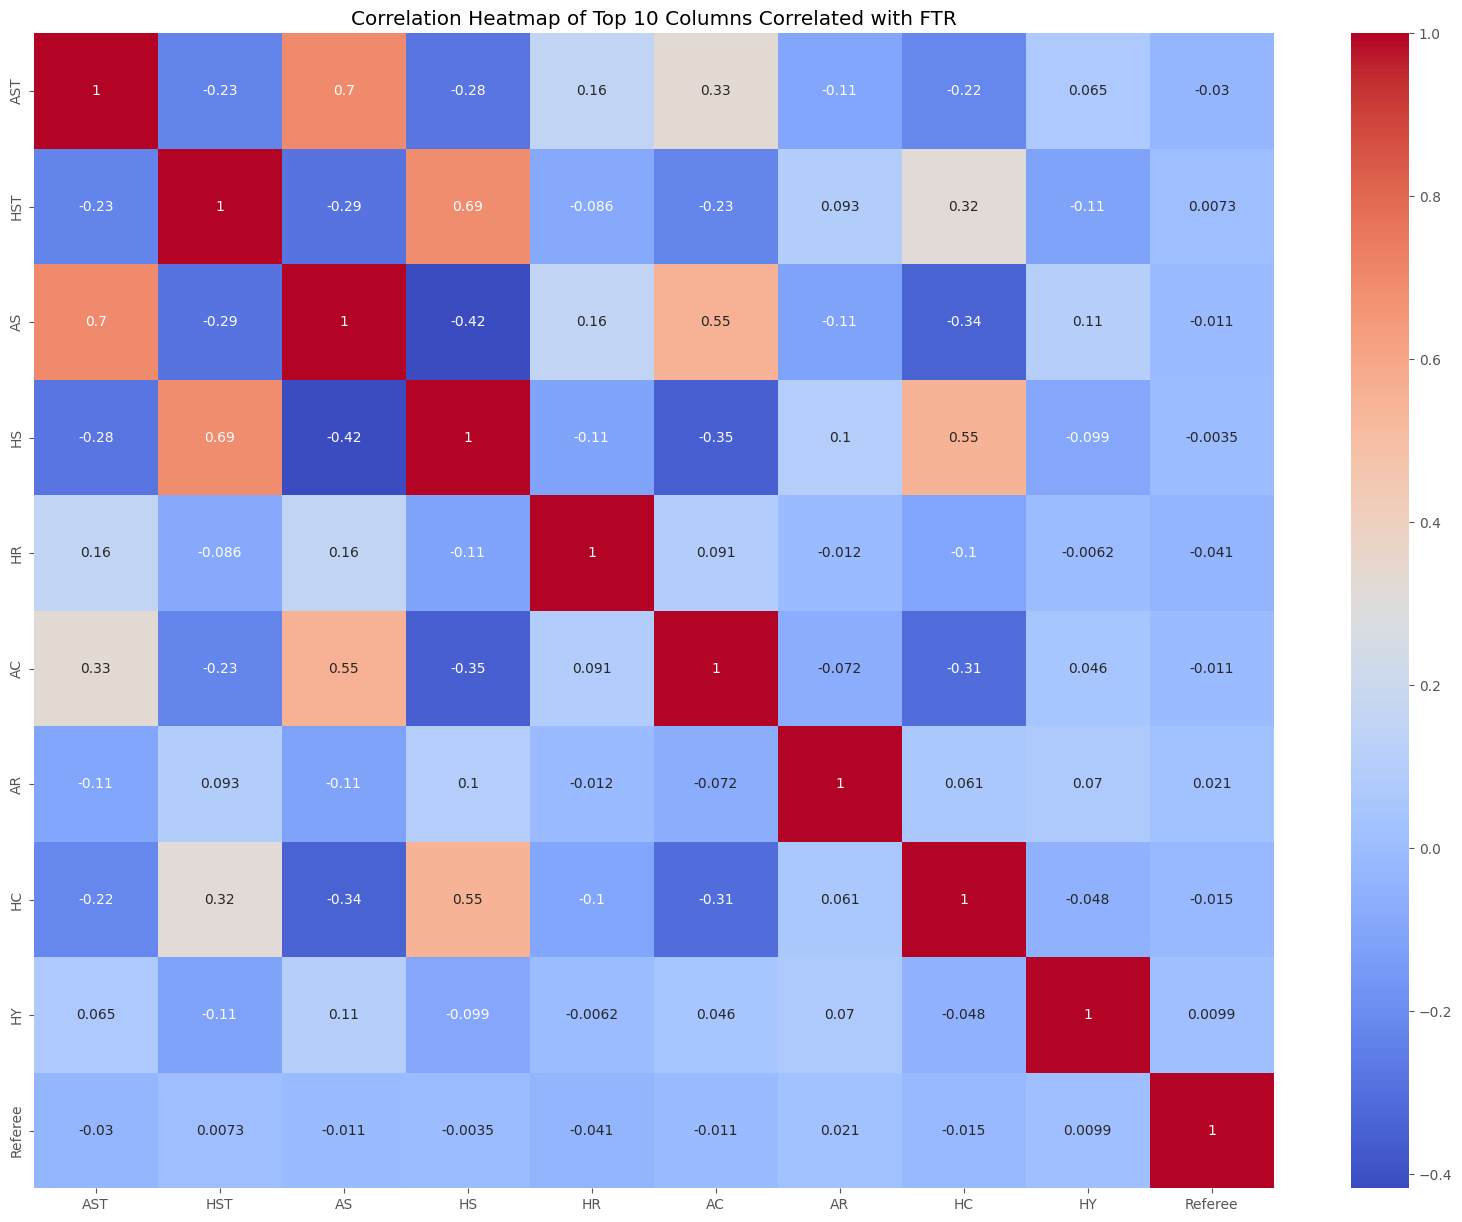

In [ ]:
# Plot the heatmap again focusing on these top 10 columns
plt.figure(figsize=(20, 15))
sns.heatmap(English_Premier_League[top_10_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top 10 Columns Correlated with FTR')
plt.show()

In [ ]:
# Separate the target variable (FTR) and select features with less significant correlation to the target
correlation_matrix = English_Premier_League.corr()
target_correlation = correlation_matrix["FTR"].abs().sort_values(ascending=False)
#target_correlation = correlation_matrix["FTR"].abs().sort_values()


# Select features with lower correlation to FTR (threshold can be adjusted as needed)
selected_features = target_correlation[target_correlation < 0.5].index.tolist()

# Drop FTR from the features list if present
if 'FTR' in selected_features:
    selected_features.remove('FTR')

# Separate the selected features into X and the target variable into y
X = English_Premier_League[selected_features]
y = English_Premier_League['FTR']

# Display the selected features
print("Selected Features: ", selected_features)

# Plot the heatmap for selected features
#plt.figure(figsize=(20, 15))
##sns.heatmap(English_Premier_League[selected_features + ['FTR']].corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Heatmap of Selected Features for Premier League Football Predictions Data')
#plt.show()

Selected Features:  ['AST', 'HST', 'AS', 'HS', 'HR', 'AC', 'AR', 'HC', 'HY', 'Referee', 'AwayTeam', 'AY', 'Date', 'AF', 'HomeTeam', 'Time', 'HF']


In [ ]:
target_correlation

FTR         1.000000
AST         0.442296
HST         0.438003
AS          0.307184
HS          0.262781
HR          0.113237
AC          0.092526
AR          0.091353
HC          0.085353
HY          0.072235
Referee     0.060130
AwayTeam    0.053213
AY          0.050553
Date        0.041700
AF          0.039065
HomeTeam    0.028994
Time        0.005921
HF          0.001427
Div              NaN
Name: FTR, dtype: float64

In [ ]:
X

,AST,HST,AS,HS,HR,AC,AR,HC,HY,Referee,AwayTeam,AY,Date,AF,HomeTeam,Time,HF
0,5,7,12,15,0,2,0,11,0,21,17,2,173,9,12,20,9
1,9,3,14,5,0,1,0,1,2,19,14,2,188,13,24,1,6
2,3,3,8,13,0,4,0,3,2,15,19,1,188,19,2,7,10
3,3,4,11,10,0,7,0,2,0,9,20,0,188,12,5,7,6
4,3,2,10,6,0,2,1,6,2,13,8,1,188,14,7,7,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2,9,8,15,0,4,0,2,1,6,1,4,376,8,7,10,10
1896,3,14,4,36,0,2,1,10,1,4,25,1,376,11,12,10,14
1897,7,6,15,15,0,4,0,4,5,20,9,4,376,20,13,10,15
1898,2,12,3,28,0,2,0,11,0,10,24,1,376,12,14,10,3


In [ ]:
y

0       2
1       0
2       1
3       2
4       1
       ..
1895    2
1896    2
1897    0
1898    2
1899    0
Name: FTR, Length: 1900, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
#from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns#

# Baseline Models

In [ ]:
English_Premier_League.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,IWCA,PSCH
0,0,173,20,12,17,2,21,15,12,7,5,9,9,11,2,0,2,0,0,18.00,1.14
1,0,188,1,24,14,0,19,5,14,3,9,6,13,1,1,2,2,0,0,1.25,11.11
2,0,188,7,2,19,1,15,13,8,3,3,10,19,3,4,2,1,0,0,3.85,1.98
3,0,188,7,5,20,2,9,10,11,4,3,6,12,2,7,0,0,0,0,2.85,2.71
4,0,188,7,7,8,1,13,6,10,2,3,16,14,6,2,2,1,0,1,2.20,3.37


In [ ]:
# Data Preprocessing
def preprocess_data(df):
    # Fill missing values
    df = df.fillna(df.median())
    return df

In [ ]:
# Label Encoding
def label_encode(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column].astype(str))
    return df

In [ ]:
# Feature Selection
def feature_selection(df):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    df = df.drop(columns=to_drop)
    return df

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Dimensionality Reduction using PCA
def apply_pca(X, n_components=0.95):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, pca

In [ ]:
# Handle Class Imbalance
def handle_imbalance(X_train, y_train):
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    return X_train_res, y_train_res

In [ ]:
# Evaluate Model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Evaluate on the training set
    train_accuracy = model.score(X_train, y_train)
    print(f'Train accuracy: {train_accuracy}')

    # Evaluate on the test set
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {test_accuracy}')

    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print('Confusion Matrix:')
    print(cm)
    print('Classification Report:')
    print(cr)

    return train_accuracy, test_accuracy, cm, cr


In [ ]:
# Hyperparameter Tuning
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

In [ ]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 45.3 MB/s eta 0:00:00


^C


In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
English_Premier_League.isnull().sum()

Div                   0
Date                  0
Time                  0
HomeTeam              0
AwayTeam              0
                     ..
AvgCAHH               0
AvgCAHA               0
Goal_Diff             0
Home_Shot_Accuracy    0
Away_Shot_Accuracy    0
Length: 109, dtype: int64

In [ ]:
# Dimensionality Reduction using PCA
def apply_pca(X, n_components=0.95):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, pca

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
#missing data
English_Premier_League = preprocess_data(English_Premier_League)

# Split Data
X = English_Premier_League[selected_features]
y = English_Premier_League['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for standardization and PCA
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95))
    ])

# Fit and transform the training data
X_train_pca = pipeline.fit_transform(X_train)

# Transform the testing data
X_test_pca = pipeline.transform(X_test)

# Handle Class Imbalance
X_train_res, y_train_res = handle_imbalance(X_train_pca, y_train)

# Define Models
models = {
        'RandomForest': RandomForestClassifier(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'SVM': SVC(random_state=42, probability=True),
        'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        'LightGBM': lgb.LGBMClassifier(random_state=42)
    }

# Hyperparameter grids
param_grids = {
        'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
        'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
        'SVM': {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
        'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 6, 9]},
        'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'num_leaves': [31, 64]}
    }

# Evaluate each model
results = {}
for model_name, model in models.items():
        print(f'\nEvaluating {model_name}...')
        best_model = hyperparameter_tuning(model, param_grids[model_name], X_train_res, y_train_res)
        train_acc, test_acc, cm, cr = evaluate_model(best_model, X_train_res, y_train_res, X_test_pca, y_test)
        results[model_name] = {
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'confusion_matrix': cm,
            'classification_report': cr
        }


# Print results
for model_name, result in results.items():
    print(f'\nResults for {model_name}:')
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print('Confusion Matrix:')
    print(result['confusion_matrix'])
    print('Classification Report:')
    print(result['classification_report'])


Evaluating RandomForest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Train accuracy: 1.0
Test accuracy: 0.6736842105263158
Confusion Matrix:
[[100  19  13]
 [ 29  24  31]
 [ 16  16 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       132
           1       0.41      0.29      0.34        84
           2       0.75      0.80      0.78       164

    accuracy                           0.67       380
   macro avg       0.62      0.62      0.61       380
weighted avg       0.65      0.67      0.66       380


Evaluating DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train accuracy: 0.9985163204747775
Test accuracy: 0.5657894736842105
Confusion Matrix:
[[ 78  27  27]
 [ 26  27  31]
 [ 23  31 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       132
           1       0.32      0.32    


Evaluating RandomForest...

Evaluating DecisionTree...

Evaluating SVM...

Evaluating XGBoost...

Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 1617, number of used features: 22
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 1617, number of used features: 22
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training

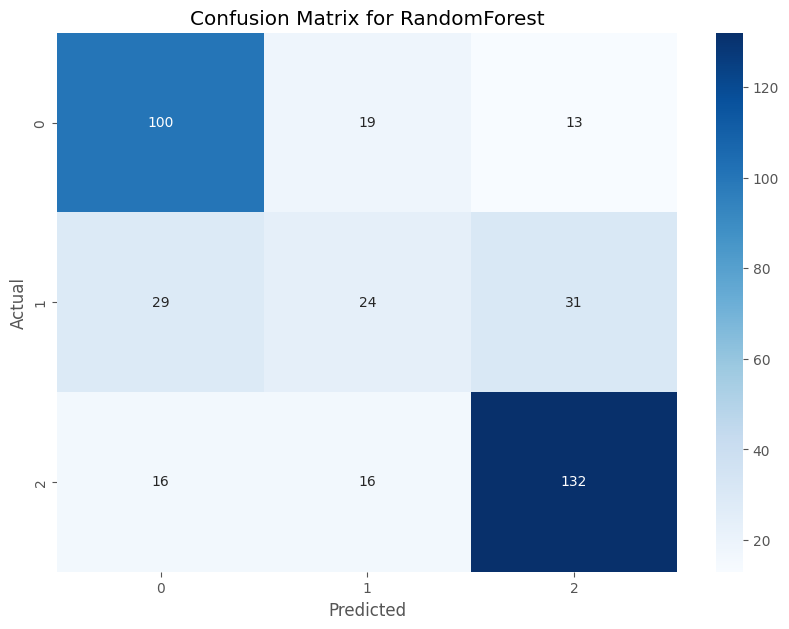


Results for DecisionTree:
Train Accuracy: 0.9985163204747775
Test Accuracy: 0.5657894736842105
Confusion Matrix:
[[ 78  27  27]
 [ 26  27  31]
 [ 23  31 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       132
           1       0.32      0.32      0.32        84
           2       0.65      0.67      0.66       164

    accuracy                           0.57       380
   macro avg       0.53      0.53      0.53       380
weighted avg       0.57      0.57      0.57       380



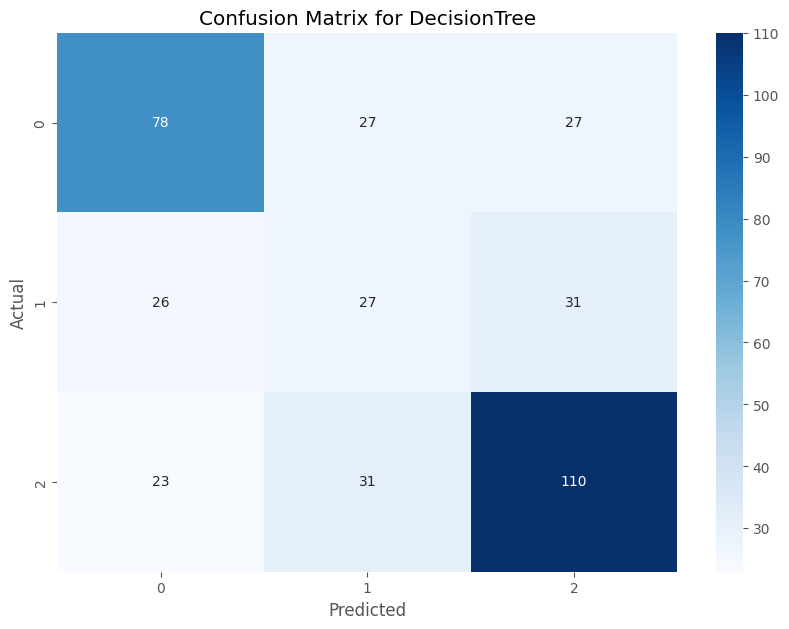


Results for SVM:
Train Accuracy: 1.0
Test Accuracy: 0.5973684210526315
Confusion Matrix:
[[ 77   7  48]
 [ 27   8  49]
 [ 17   5 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       132
           1       0.40      0.10      0.15        84
           2       0.59      0.87      0.70       164

    accuracy                           0.60       380
   macro avg       0.54      0.51      0.49       380
weighted avg       0.57      0.60      0.55       380



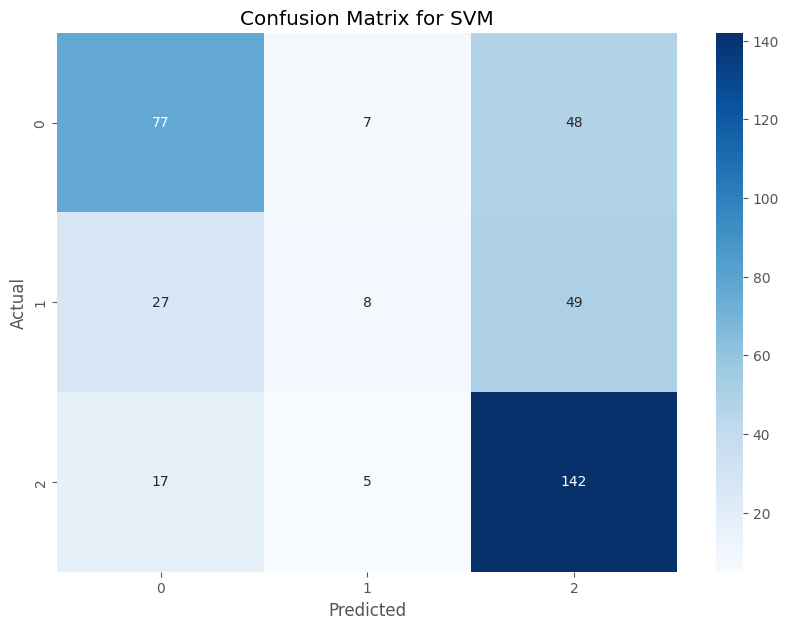


Results for XGBoost:
Train Accuracy: 1.0
Test Accuracy: 0.6447368421052632
Confusion Matrix:
[[ 94  20  18]
 [ 29  22  33]
 [ 13  22 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       132
           1       0.34      0.26      0.30        84
           2       0.72      0.79      0.75       164

    accuracy                           0.64       380
   macro avg       0.58      0.59      0.58       380
weighted avg       0.63      0.64      0.63       380



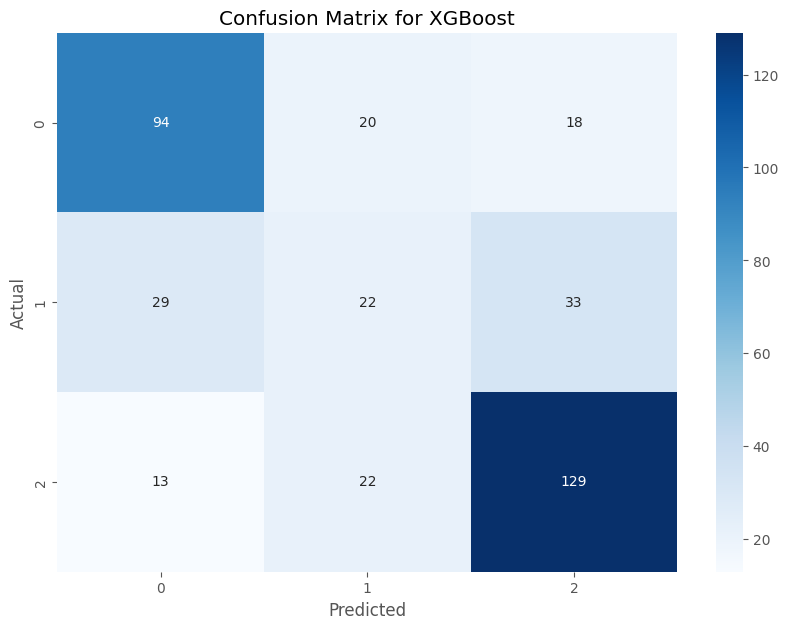


Results for LightGBM:
Train Accuracy: 1.0
Test Accuracy: 0.6710526315789473
Confusion Matrix:
[[ 99  17  16]
 [ 27  23  34]
 [ 14  17 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       132
           1       0.40      0.27      0.33        84
           2       0.73      0.81      0.77       164

    accuracy                           0.67       380
   macro avg       0.61      0.61      0.61       380
weighted avg       0.65      0.67      0.66       380



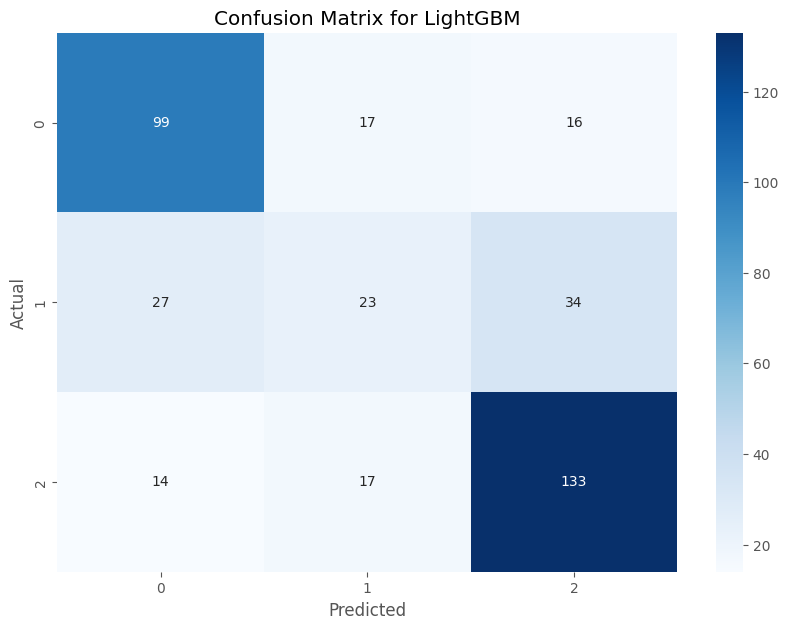

,Model,Train Accuracy,Test Accuracy
0,LightGBM,1.0,0.671053


In [ ]:
# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Hyperparameter grids
param_grids = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 6, 9]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'num_leaves': [31, 64]}
}

# Function to perform hyperparameter tuning
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)
    cm = confusion_matrix(y_test, test_predictions)
    cr = classification_report(y_test, test_predictions)
    return train_acc, test_acc, cm, cr

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f'\nEvaluating {model_name}...')
    best_model = hyperparameter_tuning(model, param_grids[model_name], X_train_res, y_train_res)
    train_acc, test_acc, cm, cr = evaluate_model(best_model, X_train_res, y_train_res, X_test_pca, y_test)
    results[model_name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'confusion_matrix': cm,
        'classification_report': cr
    }

# Print results and plot confusion matrices
for model_name, result in results.items():
    print(f'\nResults for {model_name}:')
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print('Confusion Matrix:')
    print(result['confusion_matrix'])
    print('Classification Report:')
    print(result['classification_report'])

    # Print results and plot confusion matrices
    accuracy_data = []
    # Append accuracy data
    accuracy_data.append({
        'Model': model_name,
        'Train Accuracy': result['train_accuracy'],
        'Test Accuracy': result['test_accuracy']
    })

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create a dataframe for the accuracy data
accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df

In [ ]:
# Print results and plot confusion matrices
accuracy_data = []

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
English_Premier_League= pd.read_excel('/content/ALL_TEST.xlsx')
English_Premier_League

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,17/06/2020,20:15:00,Man City,Arsenal,3,0,H,1,0,H,A Taylor,20,3,12,0,9,7,5,2,1,1,0,1
1,E0,17/10/2020,17:30:00,Man City,Arsenal,1,0,H,1,0,H,C Kavanagh,13,11,5,3,15,10,6,6,4,1,0,0
2,E0,28/08/2021,12:30:00,Man City,Arsenal,5,0,H,3,0,H,M Atkinson,25,1,10,0,5,7,14,0,1,2,0,1
3,E0,26/04/2023,20:00:00,Man City,Arsenal,4,1,H,2,0,H,M Oliver,14,8,9,2,13,13,1,3,3,1,0,0
4,E0,31/03/2024,16:30:00,Man City,Arsenal,0,0,D,0,0,D,A Taylor,12,6,1,2,9,20,7,4,0,2,0,0


In [ ]:
# Apply label encoding on object features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in English_Premier_League.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    English_Premier_League[column] = label_encoders[column].fit_transform(English_Premier_League[column])


In [ ]:
 English_Premier_League

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0,4,0,0,3,0,1,1,0,1,0,20,3,12,0,9,7,5,2,1,1,0,1
1,0,1,2,0,0,1,0,1,1,0,1,1,13,11,5,3,15,10,6,6,4,1,0,0
2,0,3,0,0,0,5,0,1,3,0,1,2,25,1,10,0,5,7,14,0,1,2,0,1
3,0,2,3,0,0,4,1,1,2,0,1,3,14,8,9,2,13,13,1,3,3,1,0,0
4,0,4,1,0,0,0,0,0,0,0,0,0,12,6,1,2,9,20,7,4,0,2,0,0


In [ ]:
# Define target variable
y = English_Premier_League['FTR']

# Define features
X = English_Premier_League.drop(columns=['FTR'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y

,FTR
0,1
1,1
2,1
3,1
4,0


In [ ]:
X

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0,4,0,0,3,0,1,0,1,0,20,3,12,0,9,7,5,2,1,1,0,1
1,0,1,2,0,0,1,0,1,0,1,1,13,11,5,3,15,10,6,6,4,1,0,0
2,0,3,0,0,0,5,0,3,0,1,2,25,1,10,0,5,7,14,0,1,2,0,1
3,0,2,3,0,0,4,1,2,0,1,3,14,8,9,2,13,13,1,3,3,1,0,0
4,0,4,1,0,0,0,0,0,0,0,0,12,6,1,2,9,20,7,4,0,2,0,0


In [ ]:
X_train

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
4,0,4,1,0,0,0,0,0,0,0,0,12,6,1,2,9,20,7,4,0,2,0,0
2,0,3,0,0,0,5,0,3,0,1,2,25,1,10,0,5,7,14,0,1,2,0,1
0,0,0,4,0,0,3,0,1,0,1,0,20,3,12,0,9,7,5,2,1,1,0,1
3,0,2,3,0,0,4,1,2,0,1,3,14,8,9,2,13,13,1,3,3,1,0,0


In [ ]:
X_test

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
1,0,1,2,0,0,1,0,1,0,1,1,13,11,5,3,15,10,6,6,4,1,0,0


In [ ]:
# Pipeline for standardization and PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])


In [ ]:
# Fit and transform the training data
X_train_pca = pipeline.fit_transform(X_train)

# Transform the testing data
X_test_pca = pipeline.transform(X_test)

In [ ]:
X_train_pca

array([[-3.80612153, -2.89639164,  0.13810239],
       [ 3.87711331, -1.6243576 , -1.60538626],
       [ 1.64105976,  0.89873414,  2.76220015],
       [-1.71205154,  3.6220151 , -1.29491628]])

In [ ]:
X_test_pca

array([[-3.45311539,  2.4730979 ,  0.24777979]])

In [ ]:
# Train the RandomForestClassifier
best_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
best_model.fit(X_train_pca, y_train)

# Save the model and the pipeline
joblib.dump(best_model, "best_model_RF.pkl")
joblib.dump(pipeline, "pipeline.pkl")

['pipeline.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)

1.3.2


In [ ]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model and the pipeline
best_model = joblib.load("best_model_RF.pkl")
pipeline = joblib.load("pipeline.pkl")

# Make predictions using the best model
prediction = best_model.predict(X_test_pca)

# Map prediction to result
result_map = {1: 'Home Win', 0: 'Draw', 2: 'Away Win'}
result = result_map[prediction[0]]

print(f"Prediction for Man City VS Arsenal: {result}")


Prediction for Man City VS Arsenal: Home Win
